<a href="https://colab.research.google.com/github/kingdraw69/class-ciencia-de-datos/blob/main/LoL_Entrega_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# .

In [ ]:
#import os

#folder = "match_data_csv_timeline"

#for filename in os.listdir(folder):
 #   file_path = os.path.join(folder, filename)
  #  try:
   #     if os.path.isfile(file_path):
    #        os.remove(file_path)
    #except Exception as e:
     #   print(f"Error deleting {file_path}: {e}")


In [ ]:
#folder = "match_data_JSON_timeline"

#for filename in os.listdir(folder):
 #   file_path = os.path.join(folder, filename)
  #  try:
   #     if os.path.isfile(file_path):
    #        os.remove(file_path)
    #except Exception as e:
     #   print(f"Error deleting {file_path}: {e}")


In [ ]:
#from google.colab import files

# This will prompt you to select a file from your local machine
#uploaded = files.upload()

# Print the names of the uploaded files
#for filename in uploaded.keys():
 #   print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving Timeline_FINAL.csv to Timeline_FINAL (1).csv
Uploaded file "Timeline_FINAL (1).csv" with length 291378 bytes


# Obtener Datos


In [ ]:
import requests
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install requests

In [ ]:
import requests

API_KEY = "RGAPI-696adeb3-5157-44ea-9fb1-7ee7862bb8fd"
PUUID = "BG6NIIfqxWEfT5VNy7Jl2t7CWEP8EXuK2NGTnbuJh-wRssTi2Z-lOYWWwFYj5Fij5jvhMTV82tligA"
REGION = "americas"


url = f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/by-puuid/{PUUID}/ids?queue=420&count=50"
headers = {"X-Riot-Token": API_KEY}

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    match_ids = response.json()
    print("Solo/Duo Match IDs:", match_ids)
except requests.exceptions.RequestException as e:
    print("Error fetching match IDs:", e)

Solo/Duo Match IDs: ['LA1_1621029778', 'LA1_1620993540', 'LA1_1620983073', 'LA1_1620973620', 'LA1_1620965550', 'LA1_1620945792', 'LA1_1620937352', 'LA1_1620890963', 'LA1_1620889324', 'LA1_1620881228', 'LA1_1620871649', 'LA1_1620852228', 'LA1_1620837274', 'LA1_1620823610', 'LA1_1620775314', 'LA1_1620759825', 'LA1_1620748655', 'LA1_1617980820', 'LA1_1617967233', 'LA1_1617941696', 'LA1_1617262036', 'LA1_1616744049', 'LA1_1616499279', 'LA1_1616484227', 'LA1_1616300725', 'LA1_1616161942', 'LA1_1614104791', 'LA1_1614094355', 'LA1_1613852932', 'LA1_1613845876', 'LA1_1613835846', 'LA1_1613825980', 'LA1_1613812900', 'LA1_1613806605', 'LA1_1612978711', 'LA1_1612968320', 'LA1_1612930424', 'LA1_1612799382', 'LA1_1612791104', 'LA1_1612778824', 'LA1_1612765129', 'LA1_1611738667', 'LA1_1611729589', 'LA1_1610743737', 'LA1_1609716004', 'LA1_1609701912', 'LA1_1609681611', 'LA1_1609674888', 'LA1_1609666939', 'LA1_1609457126']


In [ ]:
from google.colab import files

with open("Lista_IDs.txt", "w") as f:
    f.write("\n".join(match_ids))

In [ ]:
import requests
import json
import time

match_data_list = []

for match_id in match_ids:
    url = f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/{match_id}"
    headers = {"X-Riot-Token": API_KEY}

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        match_data = response.json()
        match_data_list.append(match_data)
        print(f"Downloaded match: {match_id}")


        time.sleep(1.2)

    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch {match_id}: {e}")

print(f"Total matches downloaded: {len(match_data_list)}")

Downloaded match: LA1_1621029778
Downloaded match: LA1_1620993540
Downloaded match: LA1_1620983073
Downloaded match: LA1_1620973620
Downloaded match: LA1_1620965550
Downloaded match: LA1_1620945792
Downloaded match: LA1_1620937352
Downloaded match: LA1_1620890963
Downloaded match: LA1_1620889324
Downloaded match: LA1_1620881228
Downloaded match: LA1_1620871649
Downloaded match: LA1_1620852228
Downloaded match: LA1_1620837274
Downloaded match: LA1_1620823610
Downloaded match: LA1_1620775314
Downloaded match: LA1_1620759825
Downloaded match: LA1_1620748655
Downloaded match: LA1_1617980820
Downloaded match: LA1_1617967233
Downloaded match: LA1_1617941696
Downloaded match: LA1_1617262036
Downloaded match: LA1_1616744049
Downloaded match: LA1_1616499279
Downloaded match: LA1_1616484227
Downloaded match: LA1_1616300725
Downloaded match: LA1_1616161942
Downloaded match: LA1_1614104791
Downloaded match: LA1_1614094355
Downloaded match: LA1_1613852932
Downloaded match: LA1_1613845876
Downloaded

Guardar archivos .json de las partidas

In [ ]:
import os

os.makedirs("match_data_JSON", exist_ok=True)

for match in match_data_list:
    match_id = match["metadata"]["matchId"]
    with open(f"match_data_JSON/{match_id}.json", 'w') as f:
        json.dump(match, f)

In [ ]:
import os
import json
import pandas as pd
from pandas import json_normalize

os.makedirs("match_data_CSV", exist_ok=True)

def flatten_match(json_file):
    """Fully flatten a match JSON file, preserving all fields."""
    with open(json_file, 'r') as f:
        data = json.load(f)

    metadata_df = json_normalize(data["metadata"])

    participants_df = json_normalize(data["info"]["participants"])
    participants_df["match_id"] = data["metadata"]["matchId"]

    teams_df = json_normalize(data["info"]["teams"])
    teams_df["match_id"] = data["metadata"]["matchId"]

    return metadata_df, participants_df, teams_df


all_metadata = []
all_participants = []
all_teams = []

input_folder = "match_data_JSON"
output_folder = "match_data_CSV"

for filename in os.listdir(input_folder):
    if filename.endswith(".json"):
        json_path = os.path.join(input_folder, filename)
        metadata_df, participants_df, teams_df = flatten_match(json_path)
        all_metadata.append(metadata_df)
        all_participants.append(participants_df)
        all_teams.append(teams_df)

metadata_combined = pd.concat(all_metadata, ignore_index=True)
participants_combined = pd.concat(all_participants, ignore_index=True)
teams_combined = pd.concat(all_teams, ignore_index=True)

metadata_combined.to_csv(os.path.join(output_folder, "metadata.csv"), index=False)
participants_combined.to_csv(os.path.join(output_folder, "participants.csv"), index=False)
teams_combined.to_csv(os.path.join(output_folder, "teams.csv"), index=False)

print(f"Flattened CSVs saved in '{output_folder}' folder!")


Flattened CSVs saved in 'match_data_CSV' folder!


In [ ]:
import shutil

shutil.make_archive("match_data_CSV", 'zip', "match_data_CSV")
shutil.make_archive("match_data_JSON", 'zip', "match_data_JSON")


In [ ]:
import pandas as pd

df = pd.read_csv("match_data_CSV/participants.csv")

unique_match_count = df["match_id"].nunique()

print(f"Number of unique match IDs: {unique_match_count}")


Number of unique match IDs: 50


In [ ]:
import pandas as pd

TARGET_PUUID = "BG6NIIfqxWEfT5VNy7Jl2t7CWEP8EXuK2NGTnbuJh-wRssTi2Z-lOYWWwFYj5Fij5jvhMTV82tligA"

df = pd.read_csv("match_data_CSV/participants.csv")

filtered_df = df[df["puuid"] == TARGET_PUUID]

filtered_df.to_csv("match_data_participants_RUZI.csv", index=False)

print(f"{len(filtered_df)} filas.")


50 filas.


In [ ]:
import pandas as pd

df = pd.read_csv("match_data_participants_RUZI.csv")

column_names = df.columns.tolist()

print("Column names:")
for col in column_names:
    print(col)


# Obtener Datos - Timeline

In [ ]:
match_ids

['LA1_1621029778',
 'LA1_1620993540',
 'LA1_1620983073',
 'LA1_1620973620',
 'LA1_1620965550',
 'LA1_1620945792',
 'LA1_1620937352',
 'LA1_1620890963',
 'LA1_1620889324',
 'LA1_1620881228',
 'LA1_1620871649',
 'LA1_1620852228',
 'LA1_1620837274',
 'LA1_1620823610',
 'LA1_1620775314',
 'LA1_1620759825',
 'LA1_1620748655',
 'LA1_1617980820',
 'LA1_1617967233',
 'LA1_1617941696',
 'LA1_1617262036',
 'LA1_1616744049',
 'LA1_1616499279',
 'LA1_1616484227',
 'LA1_1616300725',
 'LA1_1616161942',
 'LA1_1614104791',
 'LA1_1614094355',
 'LA1_1613852932',
 'LA1_1613845876',
 'LA1_1613835846',
 'LA1_1613825980',
 'LA1_1613812900',
 'LA1_1613806605',
 'LA1_1612978711',
 'LA1_1612968320',
 'LA1_1612930424',
 'LA1_1612799382',
 'LA1_1612791104',
 'LA1_1612778824',
 'LA1_1612765129',
 'LA1_1611738667',
 'LA1_1611729589',
 'LA1_1610743737',
 'LA1_1609716004',
 'LA1_1609701912',
 'LA1_1609681611',
 'LA1_1609674888',
 'LA1_1609666939',
 'LA1_1609457126']

In [ ]:
import requests
import json
import time

match_data_list_timeline = []

for match_id in match_ids:
    url = f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/{match_id}/timeline"
    headers = {"X-Riot-Token": API_KEY}

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        match_data = response.json()
        match_data_list_timeline.append(match_data)
        print(f"Downloaded match: {match_id}")


        time.sleep(1.2)

    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch {match_id}: {e}")

print(f"Total matches downloaded: {len(match_data_list_timeline)}")

Downloaded match: LA1_1621029778
Downloaded match: LA1_1620993540
Downloaded match: LA1_1620983073
Downloaded match: LA1_1620973620
Downloaded match: LA1_1620965550
Downloaded match: LA1_1620945792
Downloaded match: LA1_1620937352
Downloaded match: LA1_1620890963
Downloaded match: LA1_1620889324
Downloaded match: LA1_1620881228
Downloaded match: LA1_1620871649
Downloaded match: LA1_1620852228
Downloaded match: LA1_1620837274
Downloaded match: LA1_1620823610
Downloaded match: LA1_1620775314
Downloaded match: LA1_1620759825
Downloaded match: LA1_1620748655
Downloaded match: LA1_1617980820
Downloaded match: LA1_1617967233
Downloaded match: LA1_1617941696
Downloaded match: LA1_1617262036
Downloaded match: LA1_1616744049
Downloaded match: LA1_1616499279
Downloaded match: LA1_1616484227
Downloaded match: LA1_1616300725
Downloaded match: LA1_1616161942
Downloaded match: LA1_1614104791
Downloaded match: LA1_1614094355
Downloaded match: LA1_1613852932
Downloaded match: LA1_1613845876
Downloaded

In [ ]:
import os

os.makedirs("match_data_JSON_timeline", exist_ok=True)

for match in match_data_list_timeline:
    match_id = match["metadata"]["matchId"]
    with open(f"match_data_JSON_timeline/{match_id}.json", 'w') as f:
        json.dump(match, f)

In [ ]:
import os
import json
import pandas as pd

TARGET_PUUID = "BG6NIIfqxWEfT5VNy7Jl2t7CWEP8EXuK2NGTnbuJh-wRssTi2Z-lOYWWwFYj5Fij5jvhMTV82tligA"
input_folder = "match_data_JSON_timeline"
output_folder = "match_data_csv_timeline"
os.makedirs(output_folder, exist_ok=True)

def process_and_flatten_timeline(json_path):
    with open(json_path, "r") as f:
        data = json.load(f)

    match_id = data["metadata"]["matchId"]

    try:
        puuid_index = data["metadata"]["participants"].index(TARGET_PUUID)
        participant_id = str(puuid_index + 1)
    except ValueError:
        print(f"PUUID not in match {match_id}")
        return None

    if "info" not in data or "frames" not in data["info"]:
        print(f"No 'frames' in {match_id}")
        return None

    flattened_rows = []
    for frame in data["info"]["frames"]:
        timestamp = frame.get("timestamp")
        participant_data = frame["participantFrames"].get(participant_id)
        if participant_data:
            flat_row = {
                "match_id": match_id,
                "timestamp": timestamp,
                "participantId": participant_data.get("participantId"),
                "currentGold": participant_data.get("currentGold"),
                "goldPerSecond": participant_data.get("goldPerSecond"),
                "jungleMinionsKilled": participant_data.get("jungleMinionsKilled"),
                "level": participant_data.get("level"),
                "minionsKilled": participant_data.get("minionsKilled"),
                "timeEnemySpentControlled": participant_data.get("timeEnemySpentControlled"),
                "totalGold": participant_data.get("totalGold"),
                "xp": participant_data.get("xp")
            }

            for stat_key, stat_value in participant_data.get("championStats", {}).items():
                flat_row[f"championStats.{stat_key}"] = stat_value

            for dmg_key, dmg_value in participant_data.get("damageStats", {}).items():
                flat_row[f"damageStats.{dmg_key}"] = dmg_value

            if "position" in participant_data:
                flat_row["position.x"] = participant_data["position"].get("x")
                flat_row["position.y"] = participant_data["position"].get("y")

            flattened_rows.append(flat_row)

    return pd.DataFrame(flattened_rows) if flattened_rows else None

for filename in os.listdir(input_folder):
    if filename.endswith(".json"):
        path = os.path.join(input_folder, filename)
        df = process_and_flatten_timeline(path)
        if df is not None:
            output_file = os.path.join(output_folder, f"{df['match_id'].iloc[0]}_timeline_flat.csv")
            df.to_csv(output_file, index=False)
            print(f"Saved: {output_file}")



Saved: match_data_csv_timeline/LA1_1620823610_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1611738667_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1613835846_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1620759825_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1620945792_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1620973620_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1612765129_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1620993540_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1620775314_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1614094355_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1612778824_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1621029778_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1613825980_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1617262036_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_1612791104_timeline_flat.csv
Saved: match_data_csv_timeline/LA1_16096

In [ ]:
import os
import pandas as pd

timeline_folder = "match_data_csv_timeline"
combined_df_list = []

for filename in os.listdir(timeline_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(timeline_folder, filename)
        try:
            df = pd.read_csv(file_path)
            combined_df_list.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

if combined_df_list:
    universal_df = pd.concat(combined_df_list, ignore_index=True)
    output_path = "match_data_csv_timeline_universal.csv"
    universal_df.to_csv(output_path, index=False)
    print(f"✅ Saved combined timeline data to: {output_path}")
else:
    print("❌ No valid CSV files found to combine.")


✅ Saved combined timeline data to: match_data_csv_timeline_universal.csv


In [ ]:
import pandas as pd

timeline_df = pd.read_csv("match_data_csv_timeline_universal.csv")

match_df = pd.read_csv("match_data_participants_RUZI.csv")

match_win_df = match_df[["match_id", "win"]].drop_duplicates(subset="match_id")

merged_df = pd.merge(timeline_df, match_win_df, on="match_id", how="left")

merged_df.to_csv("match_data_csv_timeline_universal_labeled.csv", index=False)

print("✅ Timeline data now includes win/loss labels.")


✅ Timeline data now includes win/loss labels.


In [ ]:
import os

os.rename("match_data_participants_RUZI.csv", "Match_FINAL.csv")

os.rename("match_data_csv_timeline_universal_labeled.csv", "Timeline_FINAL.csv")

print("✅ Files renamed successfully:")
print("- match_data_participants_RUZI.csv → Match_FINAL.csv")
print("- match_data_csv_timeline_universal_labeled.csv → Timeline_FINAL.csv")


✅ Files renamed successfully:
- match_data_participants_RUZI.csv → Match_FINAL.csv
- match_data_csv_timeline_universal_labeled.csv → Timeline_FINAL.csv


# Analisis datos

Promedio de oro y experiencia a lo largo del tiempo para matches con victorias y matches con derrotas

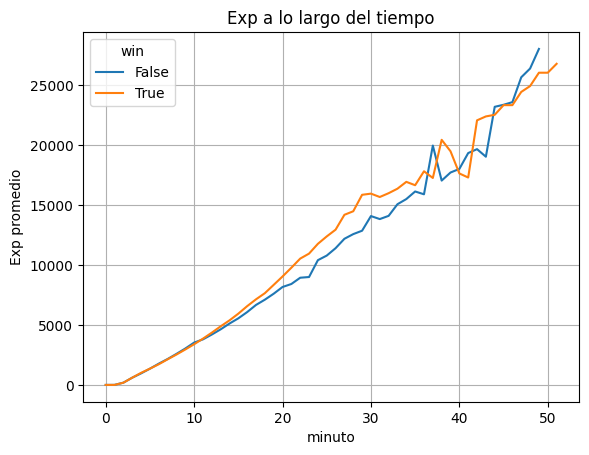

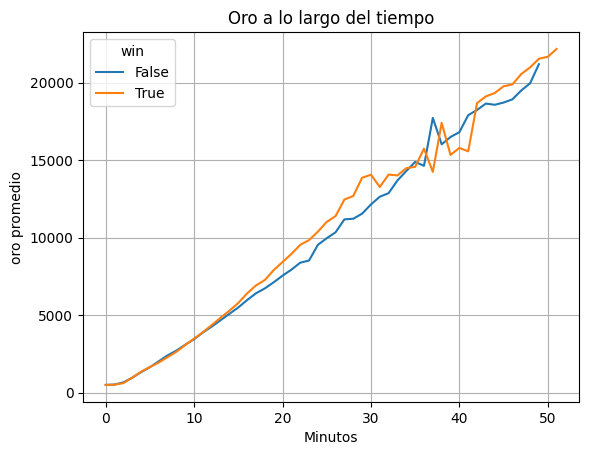

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

timeline = pd.read_csv("Timeline_FINAL.csv")

timeline['minute'] = timeline['timestamp'] // 60000

gold_xp = timeline.groupby(['minute', 'win'])[['xp', 'totalGold']].mean().reset_index()

sns.lineplot(data=gold_xp, x="minute", y="xp", hue="win")
plt.title("Exp a lo largo del tiempo")
plt.xlabel("minuto")
plt.ylabel("Exp promedio")
plt.grid(True)
plt.show()

sns.lineplot(data=gold_xp, x="minute", y="totalGold", hue="win")
plt.title("Oro a lo largo del tiempo")
plt.xlabel("Minutos")
plt.ylabel("oro promedio")
plt.grid(True)
plt.show()


Se va a intentar explicar el pico alrededor del minuto 40. Una posibilidad es que el equipo del jugador haya Obtenido el kill de un baron.

A continuacion se mide el KDA y qué valores se correlacionan más con este

In [ ]:

match_df['KDA'] = (match_df['kills'] + match_df['assists']) / match_df['deaths'].replace(0, 1)

correlation_with_kda = match_df.corr(numeric_only=True)['KDA'].sort_values(ascending=False)


<ipython-input-53-9d079c477621>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


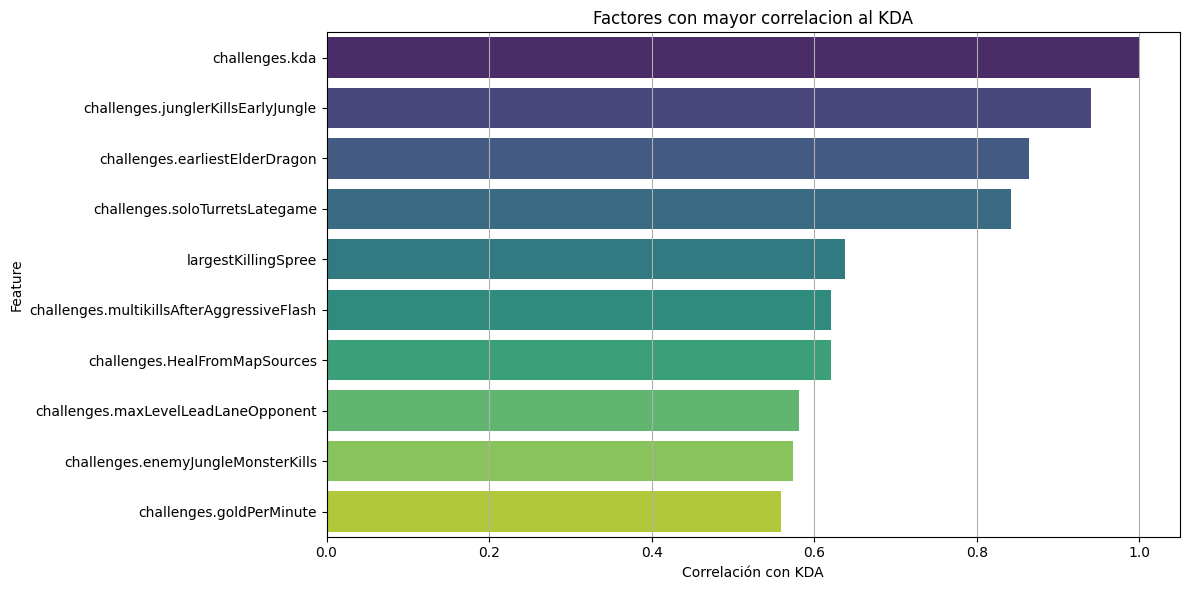

In [ ]:

top_features = top_kda_corr.drop('KDA').head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Factores con mayor correlacion al KDA")
plt.xlabel("Correlación con KDA")
plt.ylabel("Feature")
plt.xlim(0, 1.05)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


<ipython-input-57-bd92f8a39d68>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_win_corr.values, y=top_win_corr.index, palette="crest")


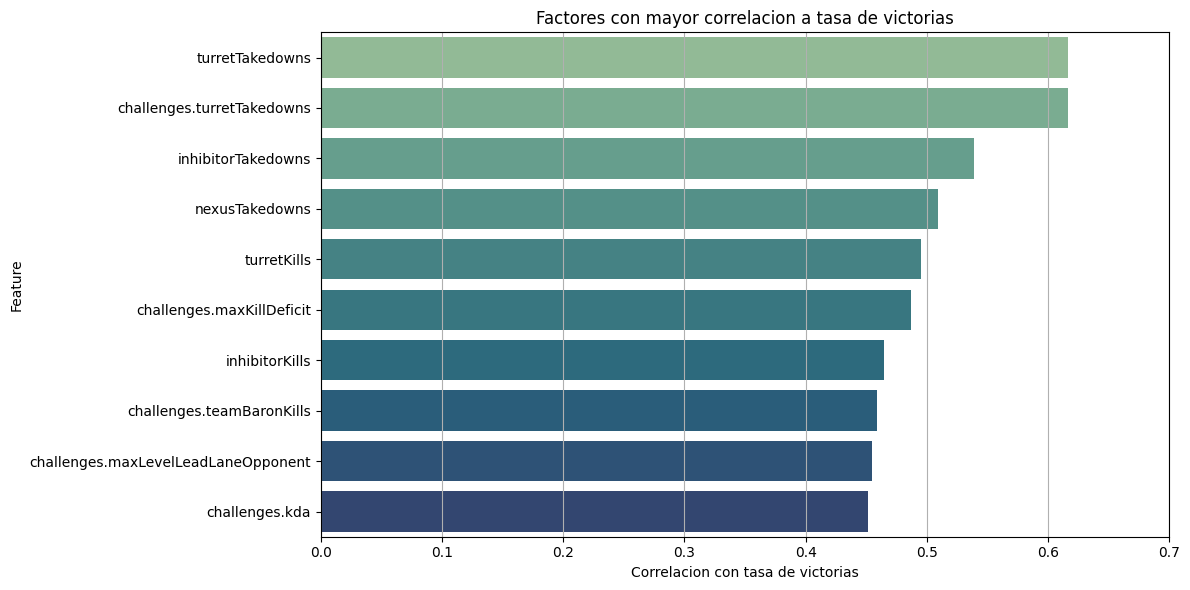

In [ ]:
correlation_with_win = match_df.corr(numeric_only=True)['win'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_win_corr.values, y=top_win_corr.index, palette="crest")
plt.title("Factores con mayor correlacion a tasa de victorias")
plt.xlabel("Correlacion con tasa de victorias")
plt.ylabel("Feature")
plt.xlim(0, 0.7)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()




<ipython-input-59-d59610cd388b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_loss_corr.values, y=top_loss_corr.index, palette="rocket")


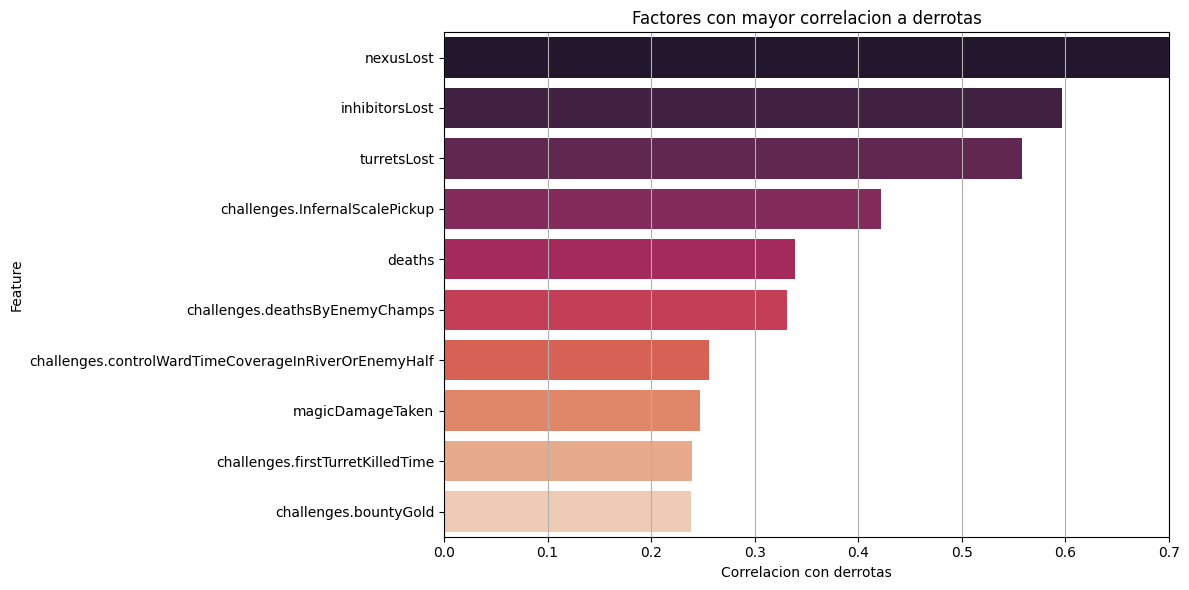

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

match_df['loss'] = 1 - match_df['win']

correlation_with_loss = match_df.corr(numeric_only=True)['loss'].sort_values(ascending=False)


top_loss_corr = correlation_with_loss.drop('loss').head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_loss_corr.values, y=top_loss_corr.index, palette="rocket")
plt.title("Factores con mayor correlacion a derrotas")
plt.xlabel("Correlacion con derrotas")
plt.ylabel("Feature")
plt.xlim(0, 0.7)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


Grafica de los campeones más utilizados junto a su tasa de victoria

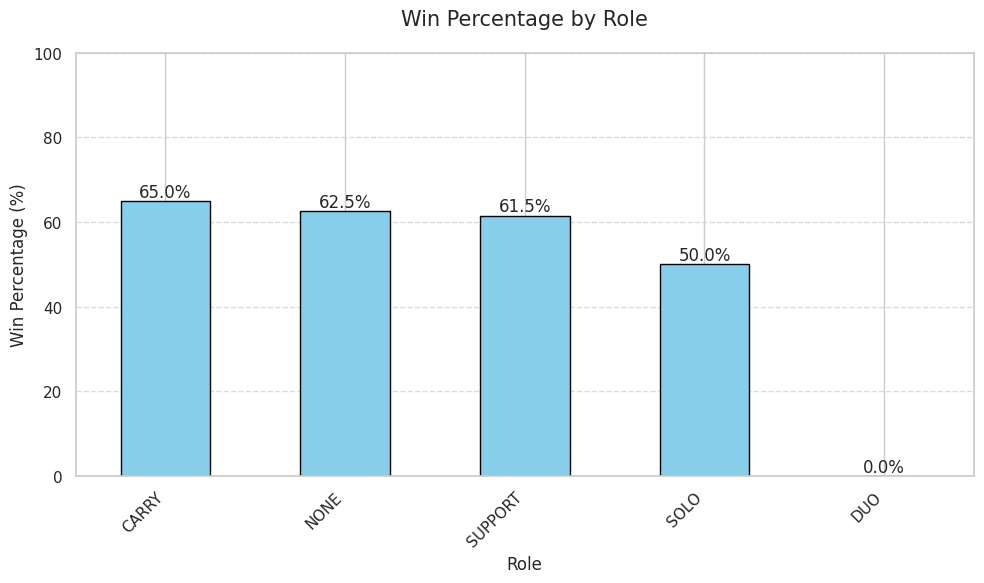

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Match_FINAL.csv')


win_percentage = (df.groupby('role')['win'].mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
win_percentage.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Win Percentage by Role', fontsize=15, pad=20)
plt.xlabel('Role', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(win_percentage):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
lucian_df = df[df['championName'] == 'Lucian']

lucian_df.to_csv('lucian.csv', index=False)

print(f"Saved {len(lucian_df)} Lucian records to 'lucian.csv'")

Saved 7 Lucian records to 'lucian.csv'


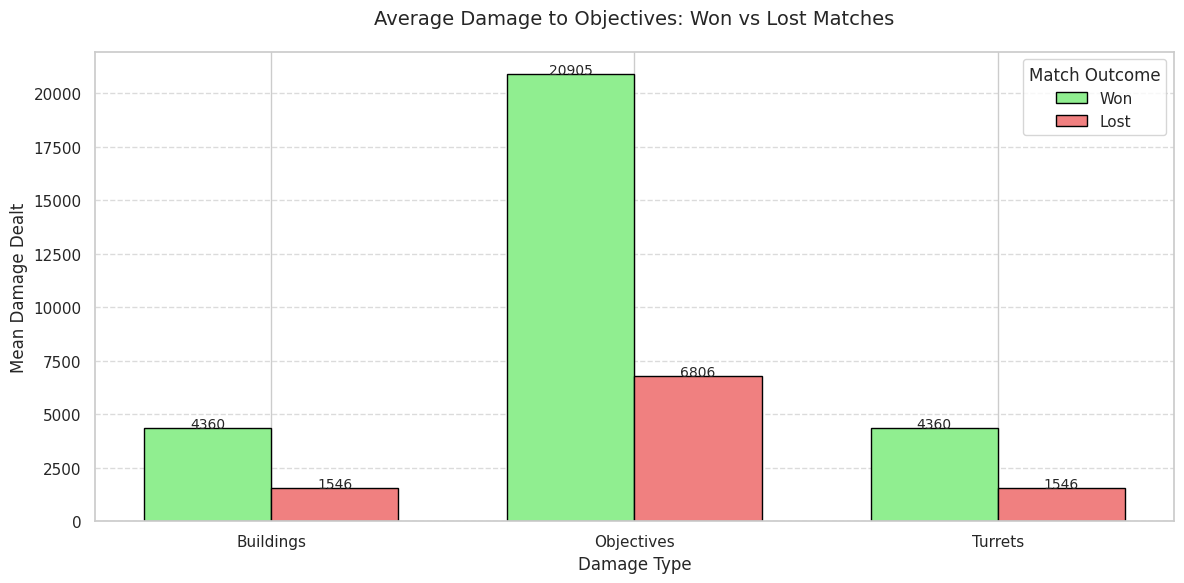

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Match_FINAL.csv')

damage_means = df.groupby('win')[['damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets']].mean()

damage_means = damage_means.reset_index()
damage_means['win'] = damage_means['win'].map({True: 'Won', False: 'Lost'})

damage_melted = damage_means.melt(id_vars='win', var_name='Damage Type', value_name='Mean Damage')

plt.figure(figsize=(12, 6))
colors = {'Won': 'lightgreen', 'Lost': 'lightcoral'}

bar_width = 0.35
x = np.arange(len(damage_melted['Damage Type'].unique()))
x_won = x - bar_width/2
x_lost = x + bar_width/2


for win_status, x_pos in zip(['Won', 'Lost'], [x_won, x_lost]):
    subset = damage_melted[damage_melted['win'] == win_status]
    plt.bar(x_pos, subset['Mean Damage'], width=bar_width,
            label=win_status, color=colors[win_status], edgecolor='black')


plt.title('Average Damage to Objectives: Won vs Lost Matches', fontsize=14, pad=20)
plt.xlabel('Damage Type', fontsize=12)
plt.ylabel('Mean Damage Dealt', fontsize=12)
plt.xticks(x, ['Buildings', 'Objectives', 'Turrets'], rotation=0)
plt.legend(title='Match Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (_, row) in enumerate(damage_melted.iterrows()):
    x_pos = x_won[i//2] if row['win'] == 'Won' else x_lost[i//2]
    plt.text(x_pos, row['Mean Damage'] + 5, f"{row['Mean Damage']:.0f}",
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()


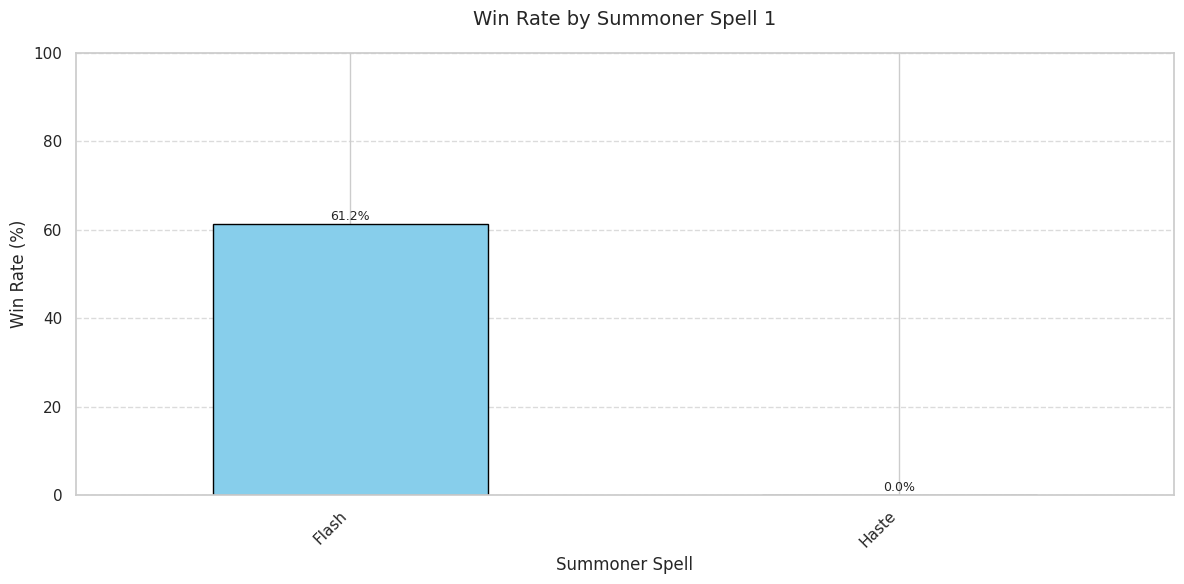

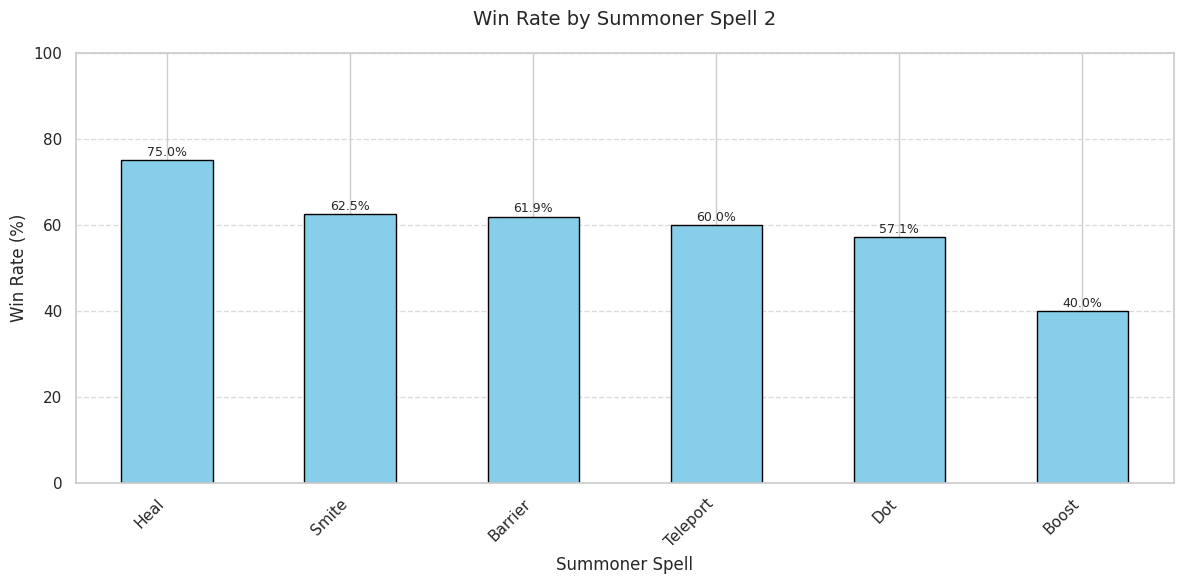

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Match_FINAL.csv')

spell_mapping = {
    4: "Flash",
    6: "Haste",
    7: "Heal",
    11: "Smite",
    21: "Barrier",
    12: "Teleport",
    14: "Dot",
    1: "Boost"
}

def plot_summoner_win_rate(column_name, title):

    win_rate = (df.groupby(column_name)['win'].mean() * 100).sort_values(ascending=False)

    win_rate.index = win_rate.index.map(spell_mapping)

    plt.figure(figsize=(12, 6))
    win_rate.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Win Rate by {title}', fontsize=14, pad=20)
    plt.xlabel('Summoner Spell', fontsize=12)
    plt.ylabel('Win Rate (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    for index, value in enumerate(win_rate):
        plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()


plot_summoner_win_rate('summoner1Id', 'Summoner Spell 1')


plot_summoner_win_rate('summoner2Id', 'Summoner Spell 2')

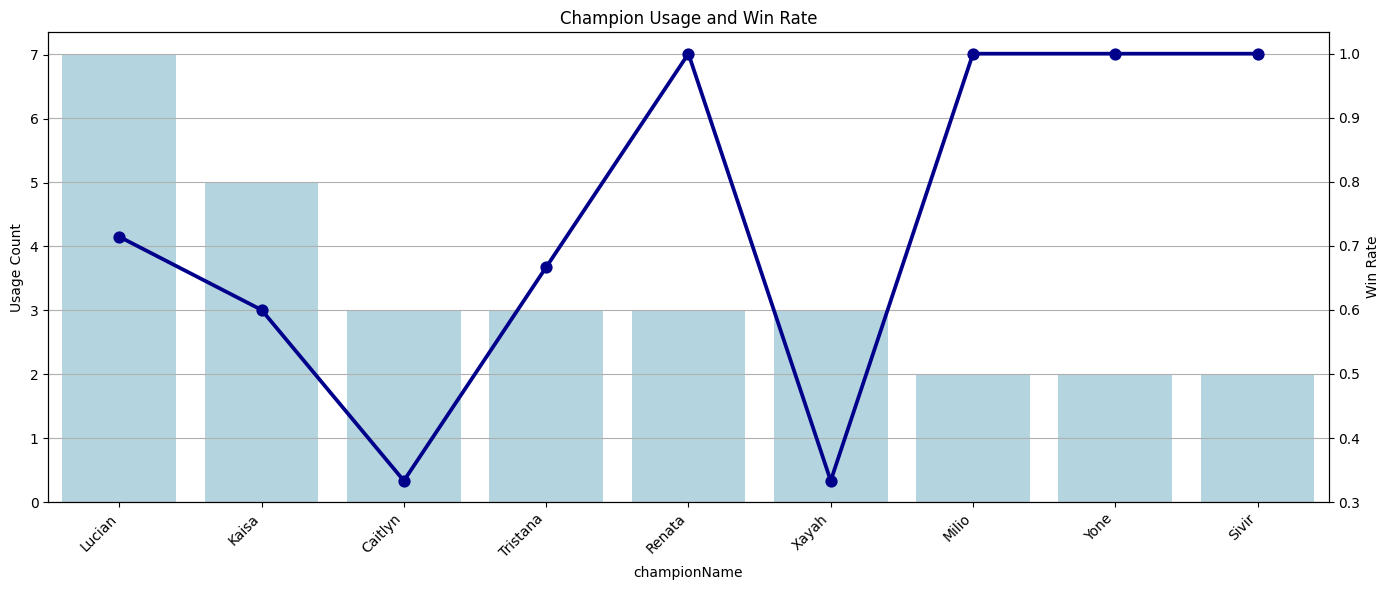

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


champion_column = 'championName'


usage_counts = match_df[champion_column].value_counts()


win_rates = match_df.groupby(champion_column)['win'].mean()


champion_stats = pd.DataFrame({
    'Usage Count': usage_counts,
    'Win Rate': win_rates
}).sort_values(by='Usage Count', ascending=False)


champion_stats = champion_stats[champion_stats['Usage Count'] >= 2]


plt.figure(figsize=(14, 6))
sns.barplot(x=champion_stats.index, y=champion_stats['Usage Count'], color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Usage Count")
plt.twinx()
sns.pointplot(x=champion_stats.index, y=champion_stats['Win Rate'], color='darkblue', marker='o')
plt.ylabel("Win Rate")
plt.title("Champion Usage and Win Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


En base a la grafica anterior, se seleccionan 3 personajes para analizar:
* Lucian
* Kaisa
* Renata

Se empieza a analizar a Lucian. Primero, los items que utilizo en cada slot y como estos afectan el win rate

<ipython-input-69-4a52364790c3>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_labels, y=filtered_items.values, ax=axes[idx], palette='viridis')
<ipython-input-69-4a52364790c3>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_labels, y=filtered_items.values, ax=axes[idx], palette='viridis')
<ipython-input-69-4a52364790c3>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_labels, y=filtered_items.values, ax=axes[idx], palette='viridis')
<ipython-input-69-4a52364790c3>:37: FutureWarning: 

Passing `palette` without ass

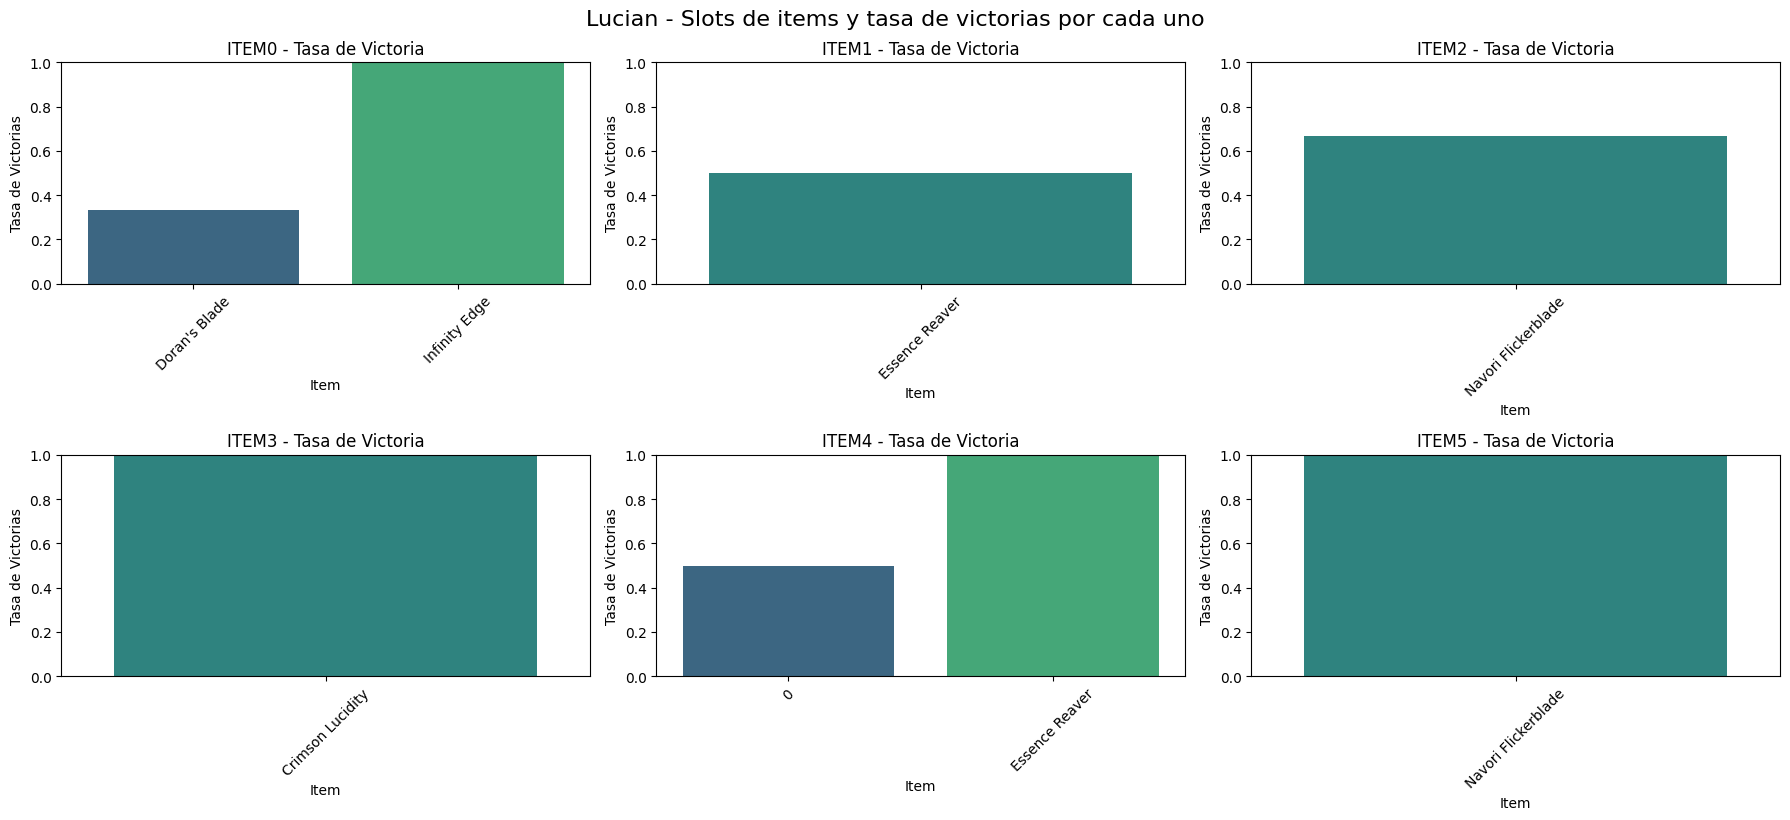

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


item_names = {
    3031: "Infinity Edge",
    1055: "Doran's Blade",
    3508: "Essence Reaver",
    6675: "Navori Flickerblade",
    3171: "Crimson Lucidity"
}


lucian_df = match_df[match_df['championName'] == 'Lucian']


item_slots = [f'item{i}' for i in range(6)]


fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()


for idx, slot in enumerate(item_slots):

    item_win_rates = lucian_df.groupby(slot)['win'].mean()
    item_counts = lucian_df[slot].value_counts()


    filtered_items = item_win_rates[item_counts[item_win_rates.index] >= 2]


    item_labels = [item_names.get(item_id, str(item_id)) for item_id in filtered_items.index]


    sns.barplot(x=item_labels, y=filtered_items.values, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{slot.upper()} - Tasa de Victoria')
    axes[idx].set_xlabel('Item')
    axes[idx].set_ylabel('Tasa de Victorias')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylim(0, 1)

plt.tight_layout()
plt.suptitle("Lucian - Slots de items y tasa de victorias por cada uno", fontsize=16, y=1.02)
plt.show()

<ipython-input-86-dad3e9b368e8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lucian_df['spell_combo'] = lucian_df.apply(


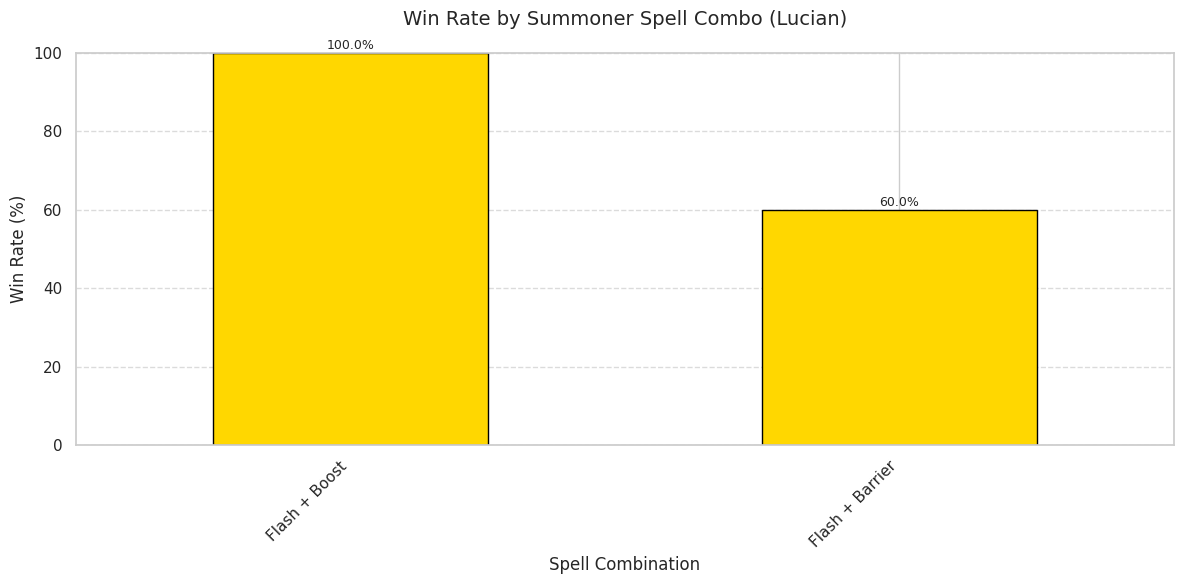

Top 5 Spell Combos for Lucian:
spell_combo
Flash + Boost      100.0
Flash + Barrier     60.0
Name: win, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Match_FINAL.csv')


spell_mapping = {
    4: "Flash",
    6: "Haste",
    7: "Heal",
    11: "Smite",
    21: "Barrier",
    12: "Teleport",
    14: "Dot",
    1: "Boost"
}


lucian_df = df[df['championName'] == 'Lucian']


lucian_df['spell_combo'] = lucian_df.apply(
    lambda row: f"{spell_mapping.get(row['summoner1Id'], 'Unknown')} + {spell_mapping.get(row['summoner2Id'], 'Unknown')}",
    axis=1
)


win_rate = (lucian_df.groupby('spell_combo')['win'].mean() * 100).sort_values(ascending=False)


plt.figure(figsize=(12, 6))
win_rate.plot(kind='bar', color='gold', edgecolor='black')


plt.title('Win Rate by Summoner Spell Combo (Lucian)', fontsize=14, pad=20)
plt.xlabel('Spell Combination', fontsize=12)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(win_rate):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Top 5 Spell Combos for Lucian:")
print(win_rate.head(5))

# Analisis datos - timeline

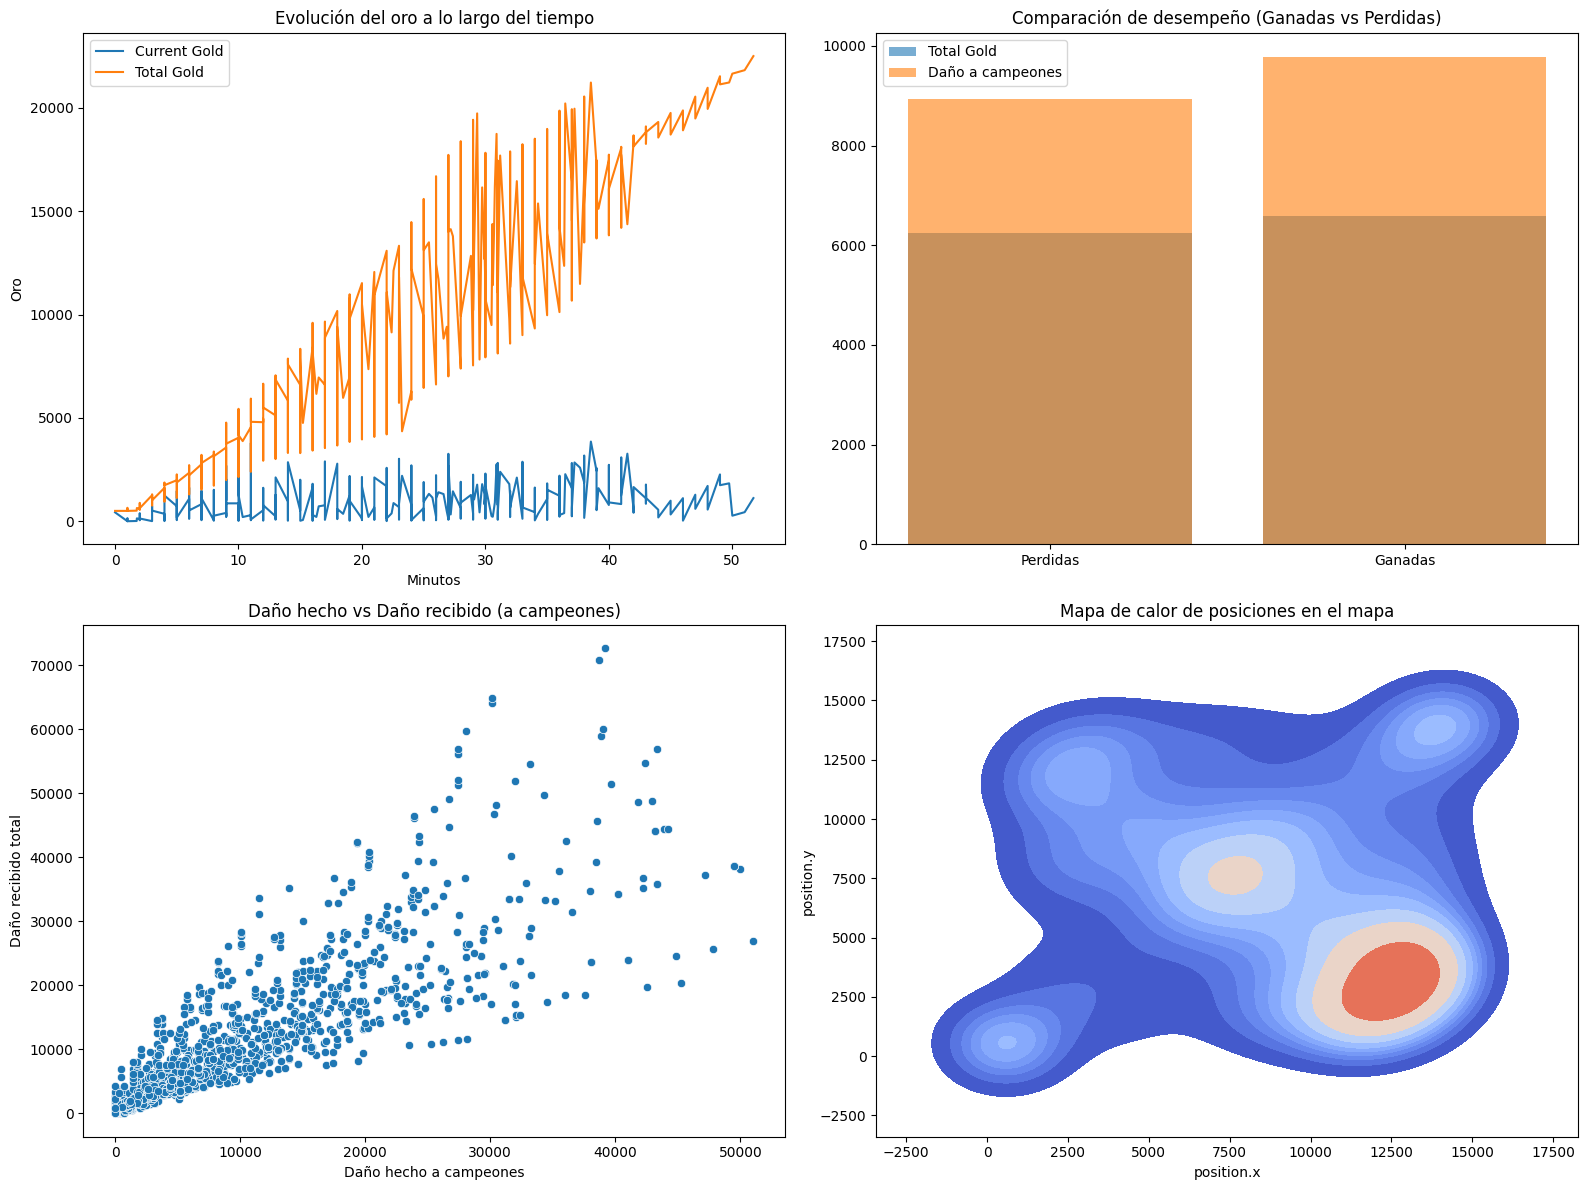

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Timeline_FINAL.csv")


df["minutes"] = df["timestamp"] / 60000


gold_evolution = df.groupby("minutes")[["currentGold", "totalGold"]].mean().reset_index()


performance_comparison = df.groupby("win")[["totalGold", "damageStats.totalDamageDoneToChampions"]].mean().reset_index()


damage_analysis = df[[
    "damageStats.totalDamageDone",
    "damageStats.totalDamageTaken",
    "damageStats.totalDamageDoneToChampions"
]]


heatmap_data = df[["position.x", "position.y"]].dropna()


fig, axs = plt.subplots(2, 2, figsize=(16, 12))


axs[0, 0].plot(gold_evolution["minutes"], gold_evolution["currentGold"], label="Current Gold")
axs[0, 0].plot(gold_evolution["minutes"], gold_evolution["totalGold"], label="Total Gold")
axs[0, 0].set_title("Evolución del oro a lo largo del tiempo")
axs[0, 0].set_xlabel("Minutos")
axs[0, 0].set_ylabel("Oro")
axs[0, 0].legend()


axs[0, 1].bar(["Perdidas", "Ganadas"], performance_comparison["totalGold"], alpha=0.6, label="Total Gold")
axs[0, 1].bar(["Perdidas", "Ganadas"], performance_comparison["damageStats.totalDamageDoneToChampions"], alpha=0.6, label="Daño a campeones")
axs[0, 1].set_title("Comparación de desempeño (Ganadas vs Perdidas)")
axs[0, 1].legend()


sns.scatterplot(data=damage_analysis, x="damageStats.totalDamageDoneToChampions", y="damageStats.totalDamageTaken", ax=axs[1, 0])
axs[1, 0].set_title("Daño hecho vs Daño recibido (a campeones)")
axs[1, 0].set_xlabel("Daño hecho a campeones")
axs[1, 0].set_ylabel("Daño recibido total")


sns.kdeplot(data=heatmap_data, x="position.x", y="position.y", fill=True, cmap="coolwarm", thresh=0.05, ax=axs[1, 1])
axs[1, 1].set_title("Mapa de calor de posiciones en el mapa")

plt.tight_layout()
plt.show()

In [ ]:

filtered_data = df[df['championId'].isin(top_champs)]

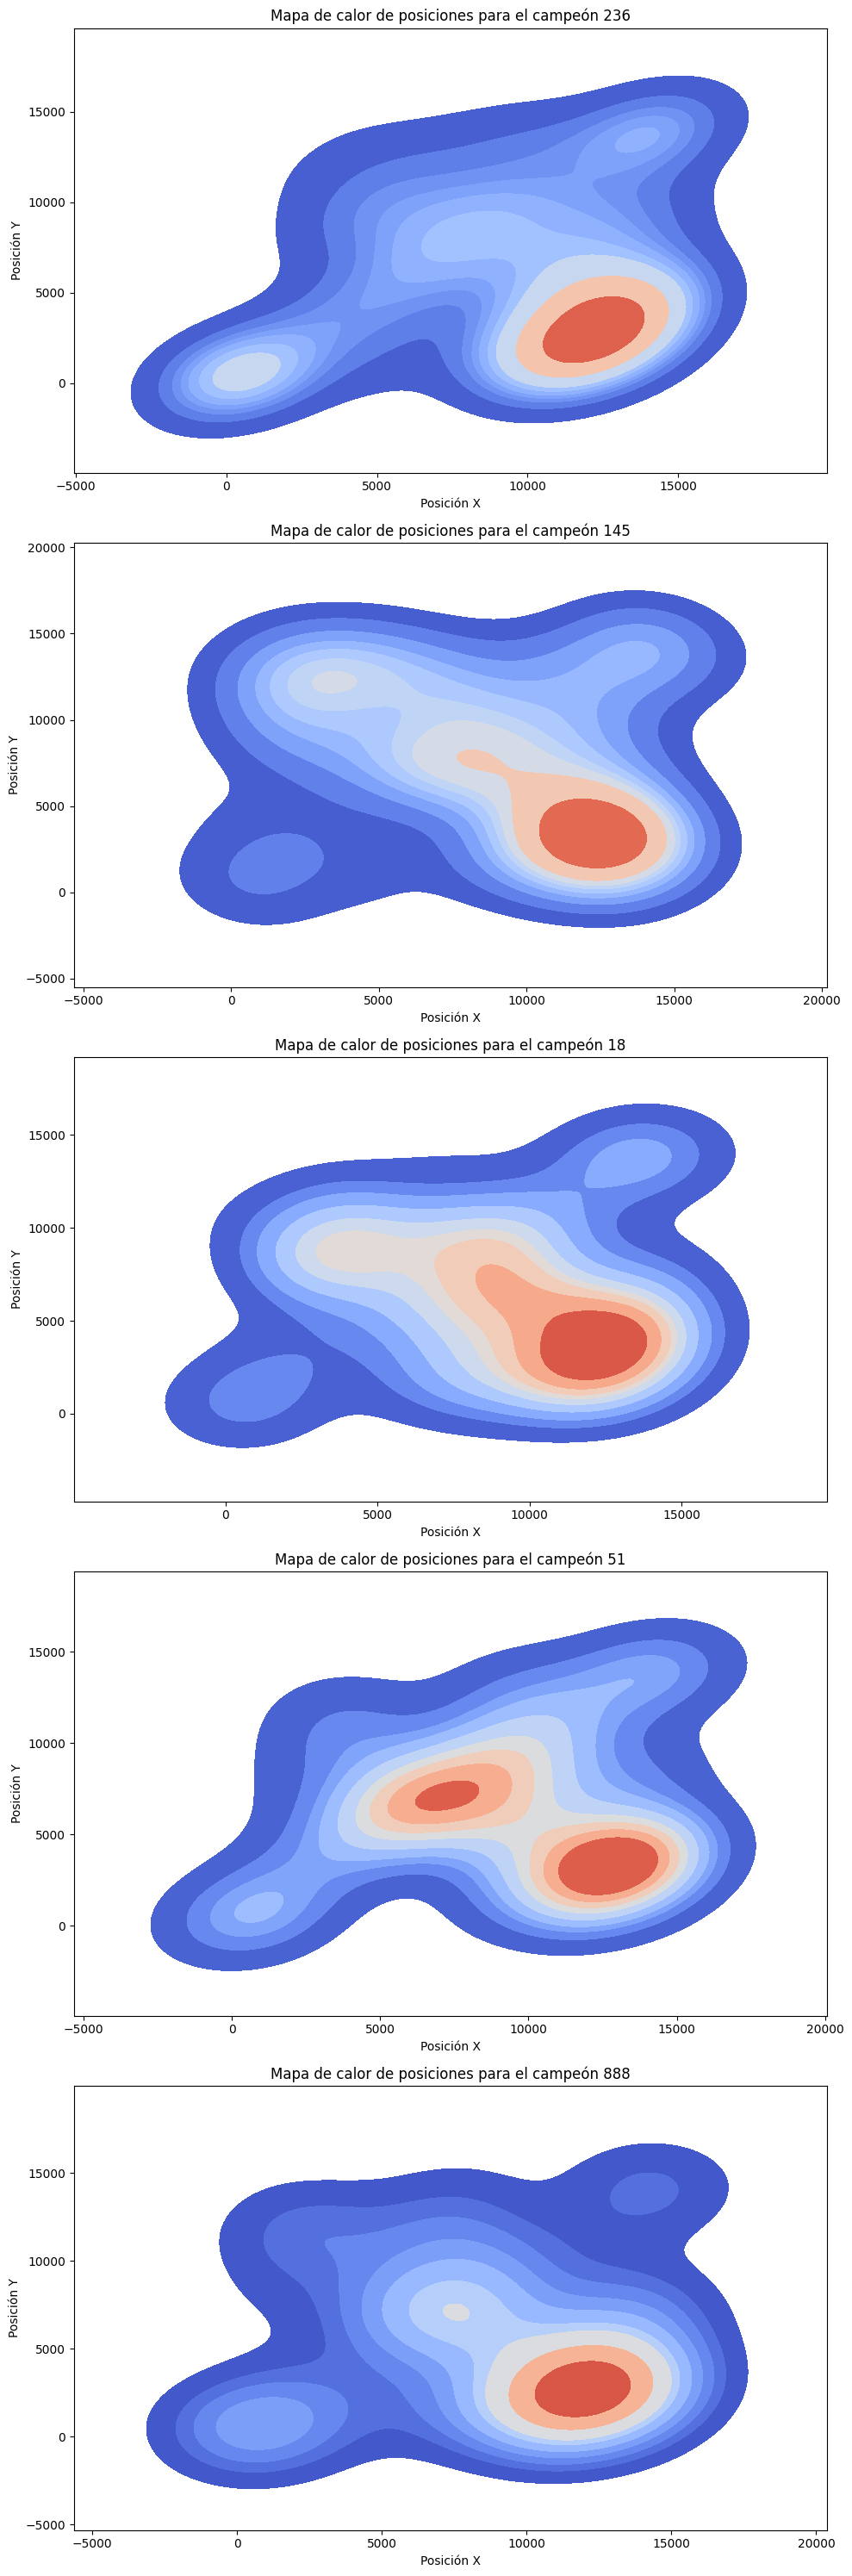

In [ ]:

fig, axs = plt.subplots(nrows=len(top_champs), ncols=1, figsize=(10, 6 * len(top_champs)))

for i, champ in enumerate(top_champs):
    champ_data = filtered_data[filtered_data['championId'] == champ]
    sns.kdeplot(
        data=champ_data,
        x="position.x",
        y="position.y",
        fill=True,
        cmap="coolwarm",
        thresh=0.05,
        ax=axs[i]
    )
    axs[i].set_title(f"Mapa de calor de posiciones para el campeón {champ}")
    axs[i].set_xlabel("Posición X")
    axs[i].set_ylabel("Posición Y")

plt.tight_layout()
plt.show()

<ipython-input-22-55ec6b20e83c>:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


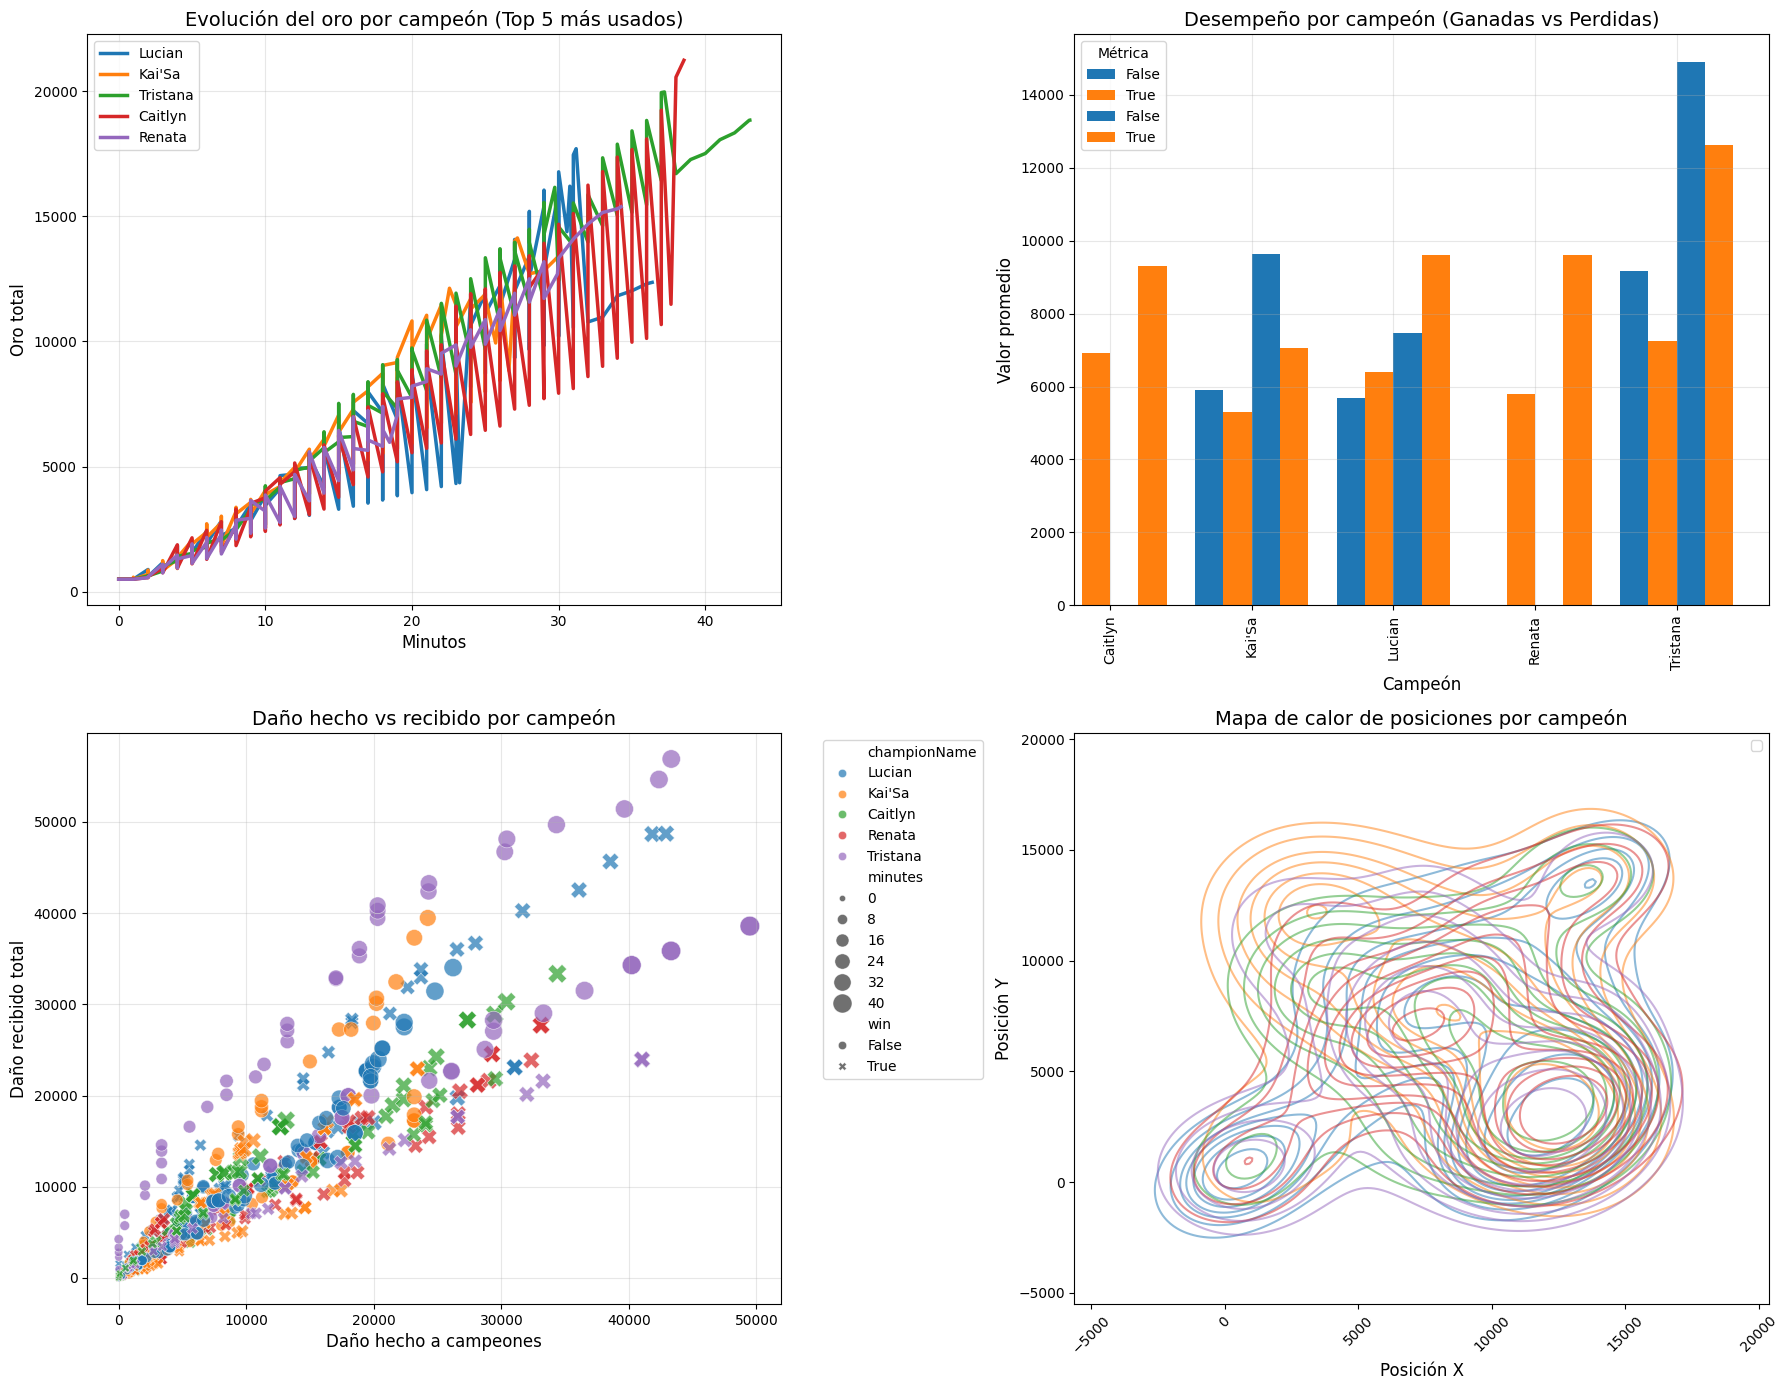

In [ ]:

top_champs = df['championId'].value_counts().head(5).index.tolist()
top_champs_names = [champion_names[champ_id] for champ_id in top_champs]


df_top = df[df['championId'].isin(top_champs)]




fig, axs = plt.subplots(2, 2, figsize=(18, 14))


for champ_id, champ_name in zip(top_champs, top_champs_names):
    champ_data = df_top[df_top['championId'] == champ_id]
    gold_evolution = champ_data.groupby("minutes")["totalGold"].mean()
    axs[0, 0].plot(gold_evolution, label=champ_name, linewidth=2.5)

axs[0, 0].set_title("Evolución del oro por campeón (Top 5 más usados)", fontsize=14)
axs[0, 0].set_xlabel("Minutos", fontsize=12)
axs[0, 0].set_ylabel("Oro total", fontsize=12)
axs[0, 0].legend()
axs[0, 0].grid(True, alpha=0.3)


performance_by_champ = df_top.groupby(['championName', 'win'])[['totalGold', 'damageStats.totalDamageDoneToChampions']].mean().unstack()


performance_by_champ['totalGold'].plot(kind='bar', ax=axs[0, 1], width=0.4, position=1, label='Oro Total')
performance_by_champ['damageStats.totalDamageDoneToChampions'].plot(kind='bar', ax=axs[0, 1], width=0.4, position=0, label='Daño a campeones')

axs[0, 1].set_title("Desempeño por campeón (Ganadas vs Perdidas)", fontsize=14)
axs[0, 1].set_xlabel("Campeón", fontsize=12)
axs[0, 1].set_ylabel("Valor promedio", fontsize=12)
axs[0, 1].legend(title='Métrica')
axs[0, 1].grid(True, alpha=0.3)
plt.xticks(rotation=45)


sns.scatterplot(
    data=df_top,
    x="damageStats.totalDamageDoneToChampions",
    y="damageStats.totalDamageTaken",
    hue="championName",
    style="win",
    size="minutes",
    sizes=(20, 200),
    alpha=0.7,
    ax=axs[1, 0]
)

axs[1, 0].set_title("Daño hecho vs recibido por campeón", fontsize=14)
axs[1, 0].set_xlabel("Daño hecho a campeones", fontsize=12)
axs[1, 0].set_ylabel("Daño recibido total", fontsize=12)
axs[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1, 0].grid(True, alpha=0.3)


for i, champ_id in enumerate(top_champs):
    champ_data = df_top[df_top['championId'] == champ_id]
    sns.kdeplot(
        data=champ_data,
        x="position.x",
        y="position.y",
        label=champion_names[champ_id],
        alpha=0.5,
        thresh=0.1,
        ax=axs[1, 1]
    )

axs[1, 1].set_title("Mapa de calor de posiciones por campeón", fontsize=14)
axs[1, 1].set_xlabel("Posición X", fontsize=12)
axs[1, 1].set_ylabel("Posición Y", fontsize=12)
axs[1, 1].legend()


plt.tight_layout()
plt.show()

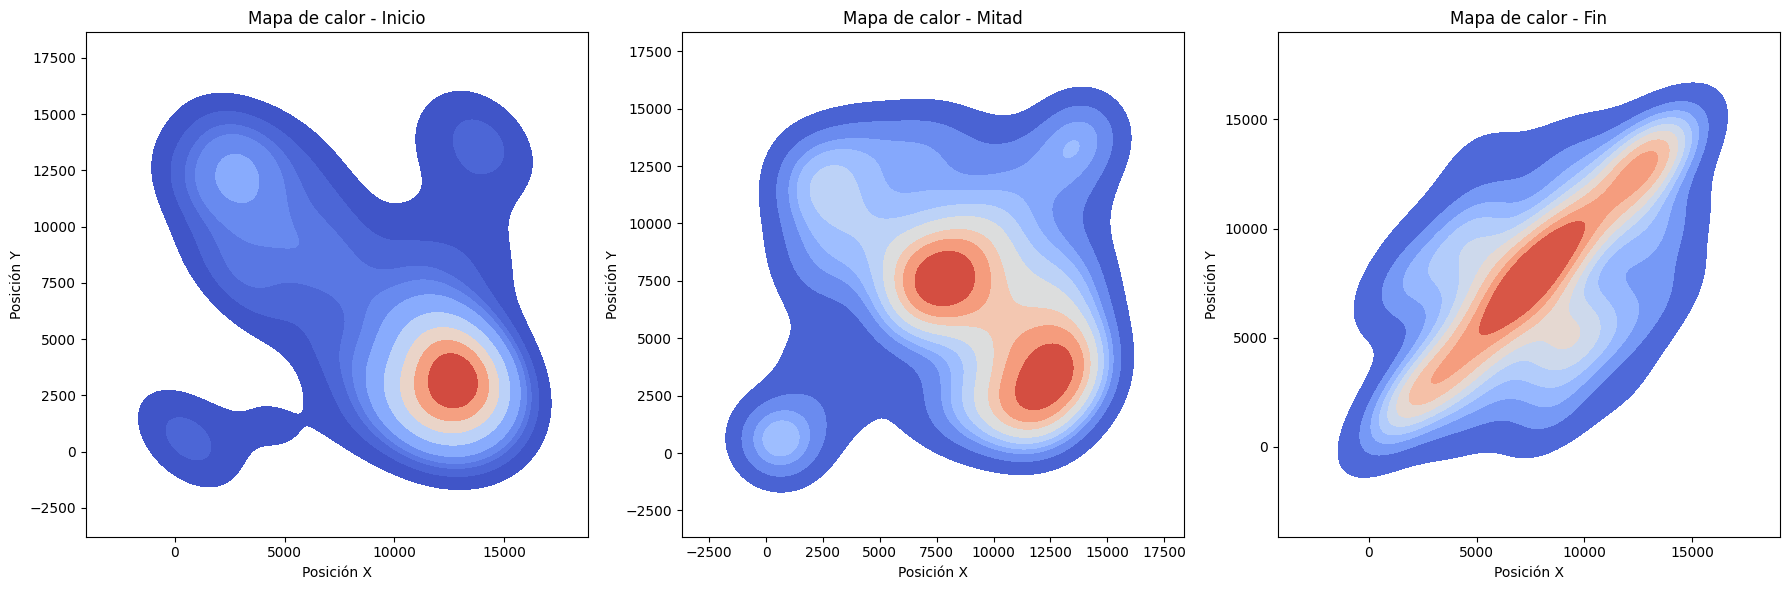

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Timeline_FINAL.csv")


bins = [0, 634453, 1668906, float('inf')]
labels = ['Inicio', 'Mitad', 'Fin']
df['time_period'] = pd.cut(df['timestamp'], bins=bins, labels=labels)


heatmap_data = df[["position.x", "position.y", "time_period"]].dropna()


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, period in enumerate(labels):
    period_data = heatmap_data[heatmap_data['time_period'] == period]
    sns.kdeplot(data=period_data,
                x="position.x",
                y="position.y",
                fill=True,
                cmap="coolwarm",
                thresh=0.05,
                ax=axs[i])
    axs[i].set_title(f"Mapa de calor - {period}")
    axs[i].set_xlabel("Posición X")
    axs[i].set_ylabel("Posición Y")

plt.tight_layout()
plt.show()

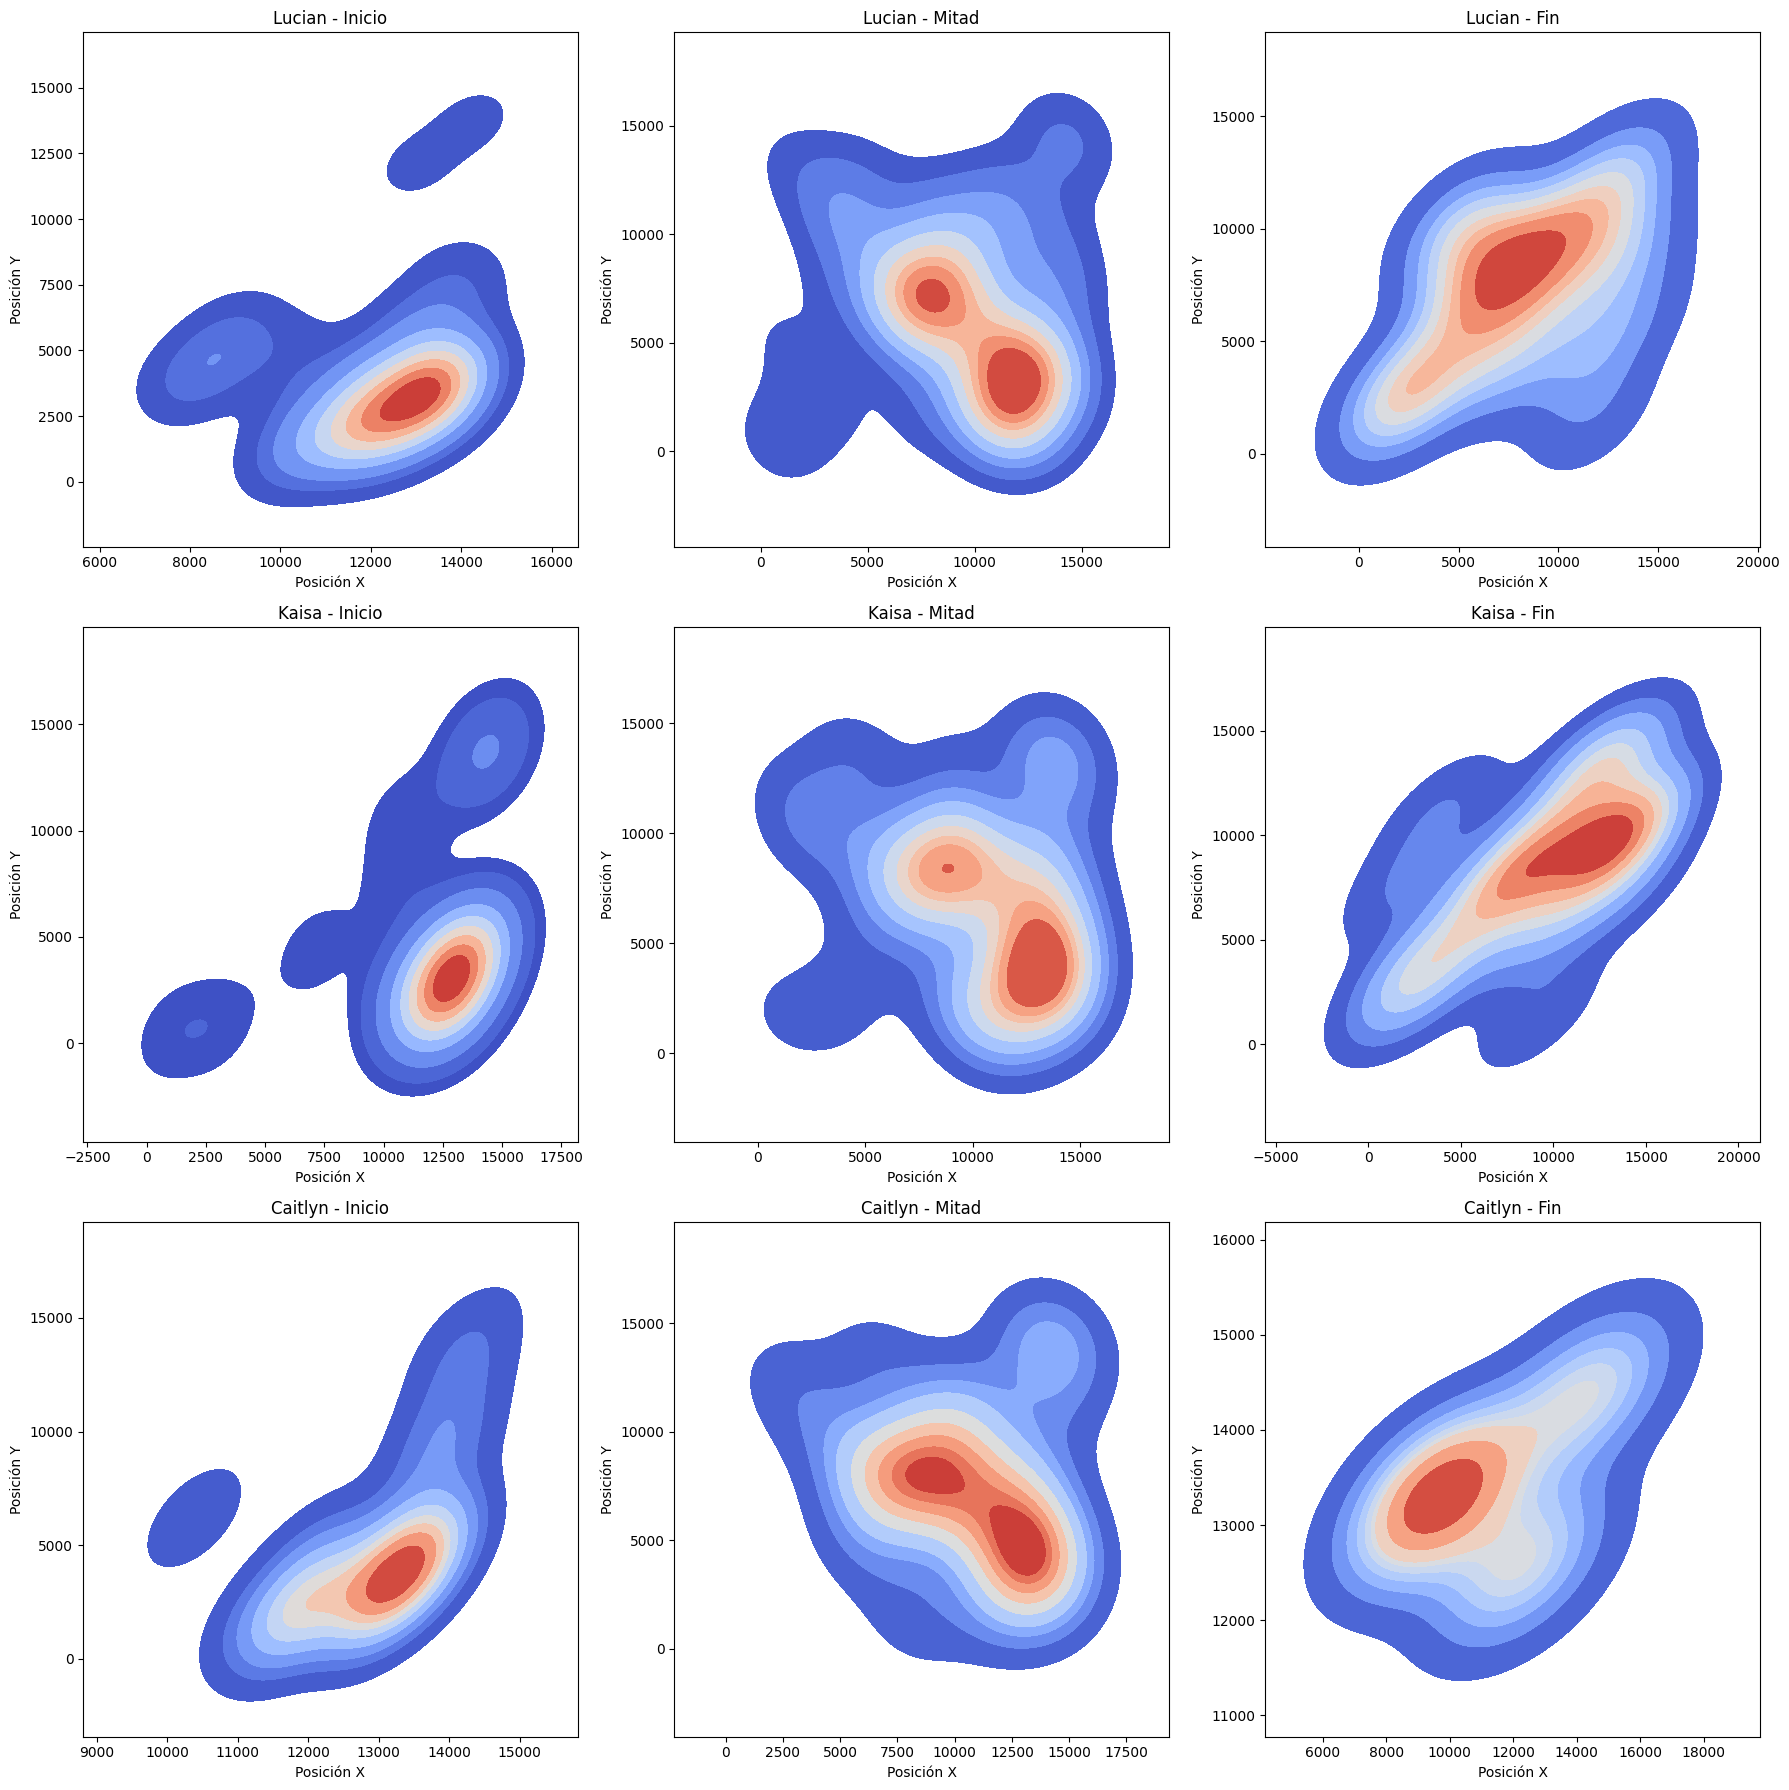

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


match_data = pd.read_csv("Match_FINAL.csv")
timeline_data = pd.read_csv("Timeline_FINAL.csv")


champions_of_interest = ["Lucian", "Kaisa", "Caitlyn"]
filtered_matches = match_data[match_data['championName'].isin(champions_of_interest)]


relevant_match_ids = filtered_matches['match_id'].unique()


filtered_timeline = timeline_data[timeline_data['match_id'].isin(relevant_match_ids)]


filtered_timeline_with_champ = filtered_timeline.merge(
    filtered_matches[['match_id', 'championName']],
    on='match_id',
    how='left'
)


bins = [0, 634453, 1668906, float('inf')]
labels = ['Inicio', 'Mitad', 'Fin']
filtered_timeline_with_champ['time_period'] = pd.cut(
    filtered_timeline_with_champ['timestamp'],
    bins=bins,
    labels=labels
)


heatmap_data = filtered_timeline_with_champ[["position.x", "position.y", "time_period", "championName"]].dropna()


fig, axs = plt.subplots(len(champions_of_interest), 3, figsize=(18, 6*len(champions_of_interest)))


for row, champion in enumerate(champions_of_interest):
    champ_data = heatmap_data[heatmap_data['championName'] == champion]

    for col, period in enumerate(labels):
        period_data = champ_data[champ_data['time_period'] == period]

        if len(period_data) > 0:
            sns.kdeplot(
                data=period_data,
                x="position.x",
                y="position.y",
                fill=True,
                cmap="coolwarm",
                thresh=0.05,
                ax=axs[row, col]
            )

        axs[row, col].set_title(f"{champion} - {period}")
        axs[row, col].set_xlabel("Posición X")
        axs[row, col].set_ylabel("Posición Y")

plt.tight_layout()
plt.show()

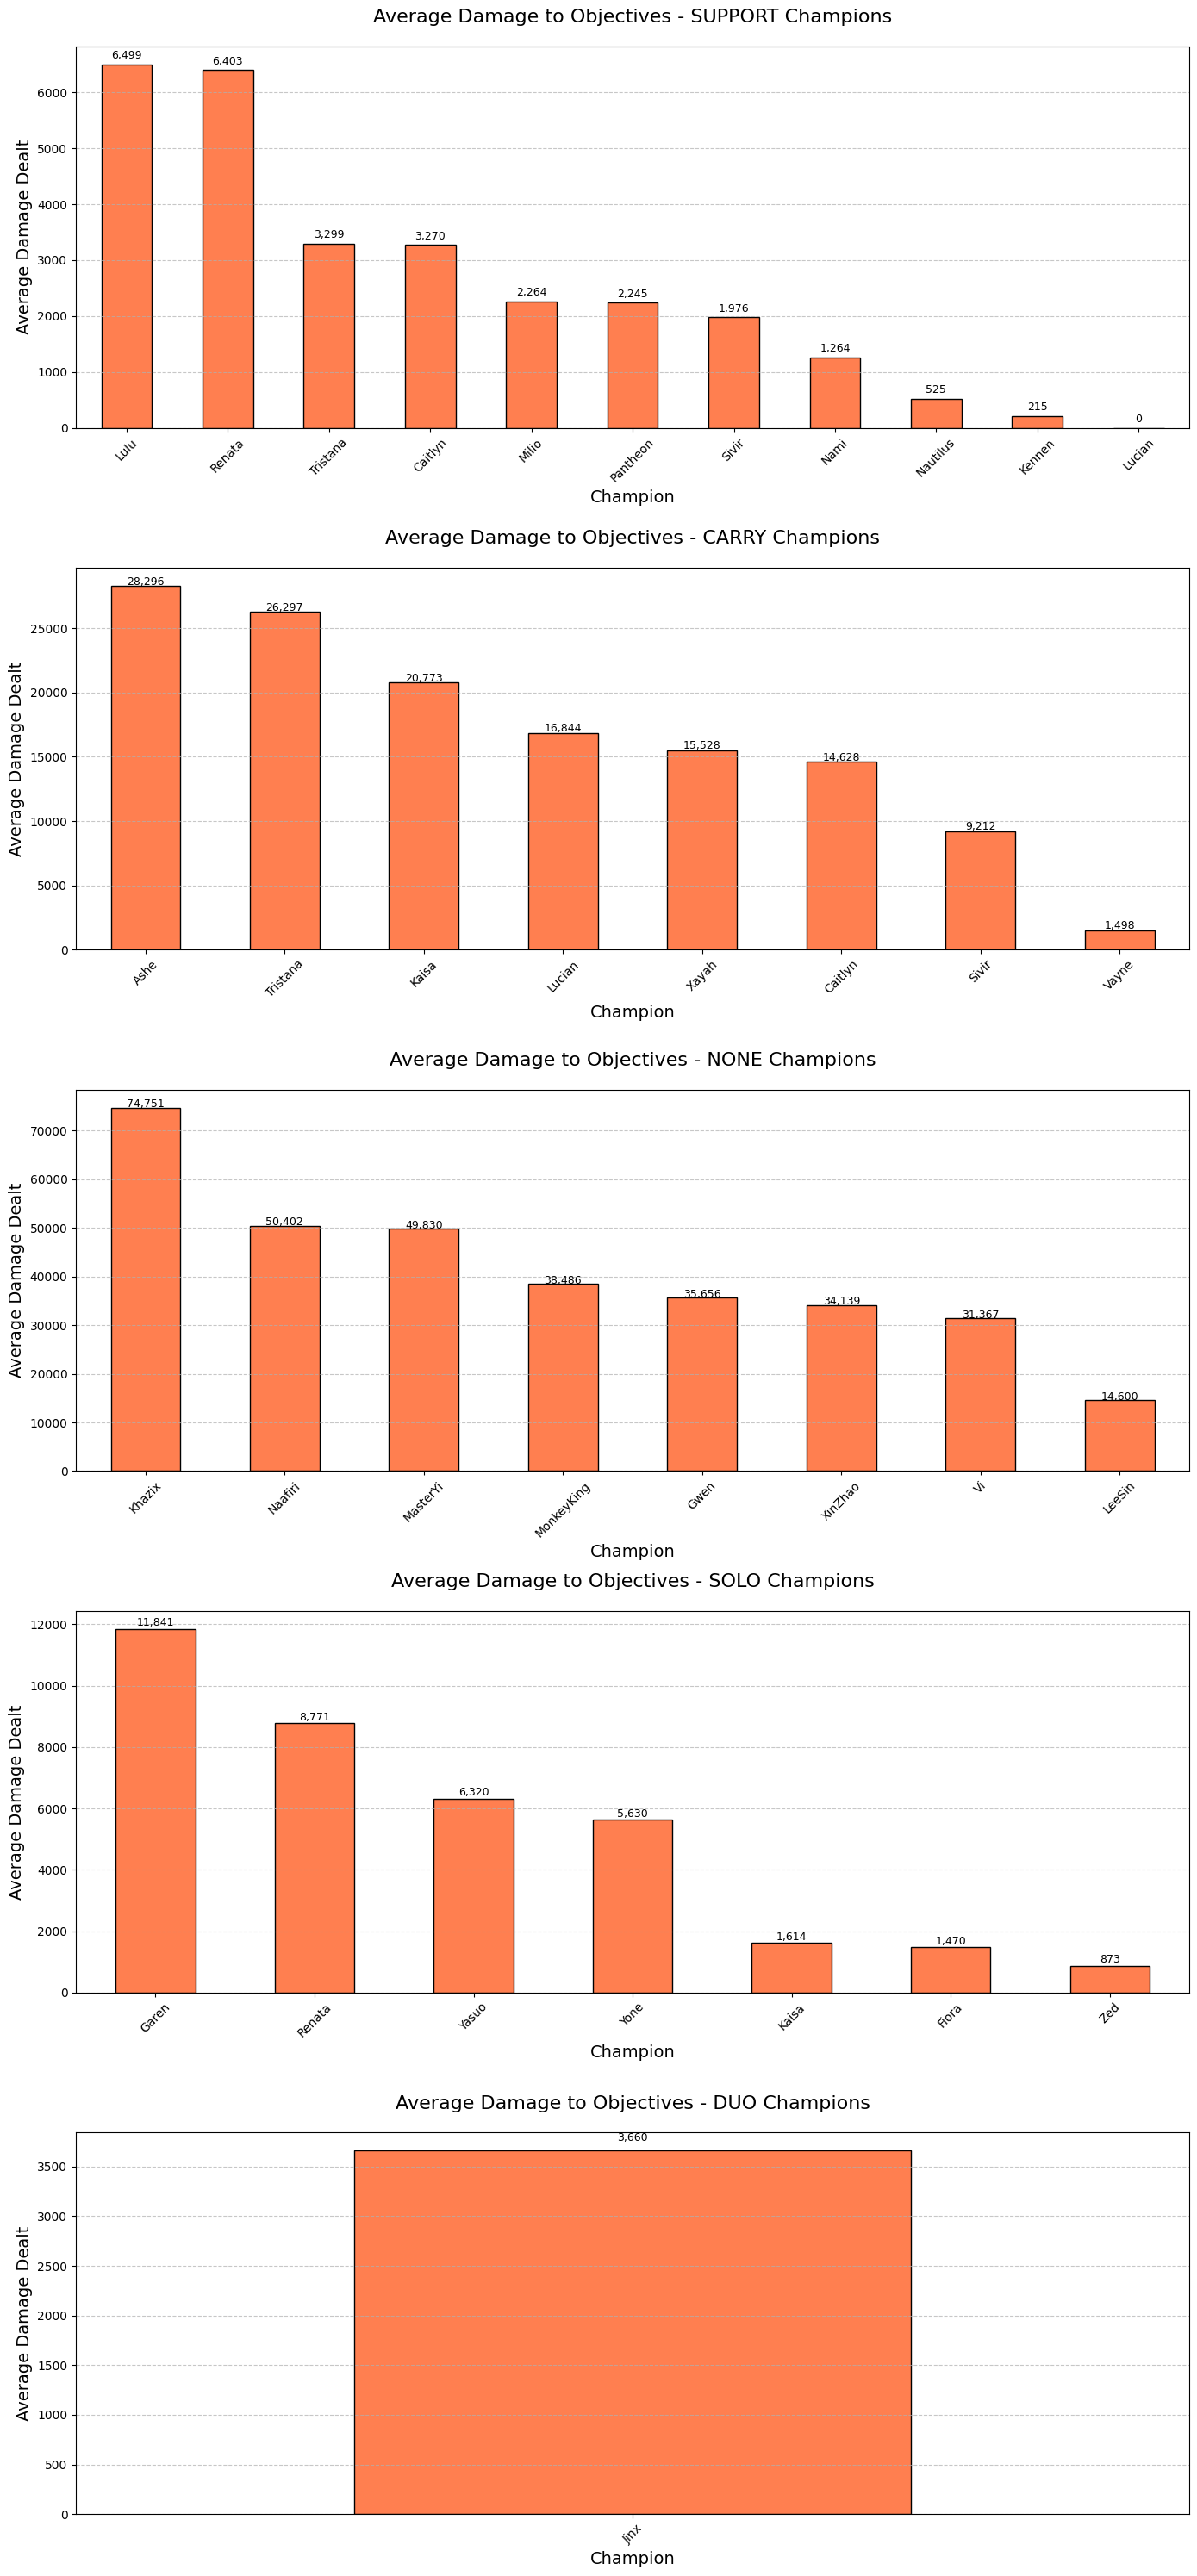


Top 3 Champions by Average Damage to Objectives per Role:

SUPPORT:
championName
Lulu        6499.0
Renata      6403.5
Tristana    3299.0
Name: damageDealtToObjectives, dtype: float64

CARRY:
championName
Ashe        28296.0
Tristana    26297.0
Kaisa       20773.0
Name: damageDealtToObjectives, dtype: float64

NONE:
championName
Khazix      74751.0
Naafiri     50402.0
MasterYi    49830.0
Name: damageDealtToObjectives, dtype: float64

SOLO:
championName
Garen     11841.0
Renata     8771.0
Yasuo      6320.0
Name: damageDealtToObjectives, dtype: float64

DUO:
championName
Jinx    3660.0
Name: damageDealtToObjectives, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Match_FINAL.csv')

df = df[df['role'] != 'none']

roles = df['role'].unique()

fig, axes = plt.subplots(len(roles), 1, figsize=(14, 6*len(roles)))

if len(roles) == 1:
    axes = [axes]

for i, role in enumerate(roles):
    role_data = df[df['role'] == role]

    avg_damage = role_data.groupby('championName')['damageDealtToObjectives'].mean().sort_values(ascending=False)

    ax = axes[i]
    avg_damage.plot(kind='bar', color='coral', edgecolor='black', ax=ax)

    ax.set_title(f'Average Damage to Objectives - {role} Champions', fontsize=16, pad=20)
    ax.set_xlabel('Champion', fontsize=14)
    ax.set_ylabel('Average Damage Dealt', fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for index, value in enumerate(avg_damage):
        ax.text(index, value + 100, f"{int(value):,}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTop 3 Champions by Average Damage to Objectives per Role:")
for role in roles:
    role_data = df[df['role'] == role]
    top_champs = role_data.groupby('championName')['damageDealtToObjectives'].mean().sort_values(ascending=False).head(3)
    print(f"\n{role}:")
    print(top_champs)

In [ ]:
import pandas as pd
import ast

df = pd.read_csv("Match_FINAL.csv")

df['legendary_items'] = df['challenges.legendaryItemUsed'].apply(
    lambda x: tuple(sorted(ast.literal_eval(x))) if pd.notnull(x) else tuple()
)

legendary_stats = (
    df.groupby('legendary_items')['win']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'total_games', 'sum': 'wins'})
)
legendary_stats['win_rate'] = legendary_stats['wins'] / legendary_stats['total_games']

legendary_stats = legendary_stats.sort_values(by=['win_rate', 'total_games'], ascending=[False, False])

legendary_stats


,total_games,wins,win_rate
legendary_items,,,
"(3031, 3036, 3508, 6675)",2,2,1.000000
"(3032,)",2,2,1.000000
"(3153, 6631, 6673)",2,2,1.000000
"(2065, 3107, 3504, 3870, 6617)",1,1,1.000000
"(2065, 3870, 6617)",1,1,1.000000
"(2504, 3071, 3078)",1,1,1.000000
"(3026, 3036, 3814, 6692, 6696, 6697)",1,1,1.000000
"(3031, 3032, 3036, 6675)",1,1,1.000000
"(3031, 3033, 3046, 3072, 6672)",1,1,1.000000


In [ ]:
item_id_to_name = {
    2065: "Shurelya's Battlesong",
    2504: "Kaenic Rookern",
    3026: "Guardian Angel",
    3031: "Infinity Edge",
    3032: "Yun Tal Wildarrows",
    3033: "Mortal Reminder",
    3036: "Lord Dominik's Regards",
    3041: "Mejai's Soulstealer",
    3046: "Phantom Dancer",
    3053: "Sterak's Gage",
    3071: "Black Cleaver",
    3072: "Bloodthirster",
    3074: "Ravenous Hydra",
    3078: "Trinity Force",
    3085: "Runaan's Hurricane",
    3089: "Rabadon's Deathcap",
    3094: "Rapid Firecannon",
    3107: "Redemption",
    3115: "Nashor's Tooth",
    3124: "Guinsoo's Rageblade",
    3142: "Youmuu's Ghostblade",
    3153: "Blade of The Ruined King",
    3157: "Zhonya's Hourglass",
    3161: "Spear of Shojin",
    3190: "Locket of the Iron Solari",
    3504: "Ardent Censer",
    3508: "Essence Reaver",
    3748: "Titanic Hydra",
    3814: "Edge of Night",
    3870: "Dream Maker",
    3871: "Zaz'Zak's Realmspike",
    3876: "Solstice Sleigh",
    3877: "Bloodsong",
    3869: "Celestial Opposition",
    4645: "Shadowflame",
    6610: "Sundered Sky",
    6617: "Moonstone Renewer",
    6631: "Stridebreaker",
    6672: "Kraken Slayer",
    6673: "Immortal Shieldbow",
    6675: "Navori Flickerblade",
    6676: "The Collector",
    6692: "Eclipse",
    6696: "Axiom Arc",
    6697: "Hubris",
    6699: "Voltaic Cyclosword"
}

In [ ]:
import pandas as pd
import ast

df = pd.read_csv("Match_FINAL.csv")

def parse_legendary(val):
    if pd.isna(val): return ()
    try:
        ids = sorted(ast.literal_eval(val))
        return tuple(item_id_to_name.get(i, f"Unknown({i})") for i in ids)
    except:
        return ()

df['legendary_items_named'] = df['challenges.legendaryItemUsed'].apply(parse_legendary)

legendary_stats_named = (
    df.groupby('legendary_items_named')['win']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'total_games', 'sum': 'wins'})
)
legendary_stats_named['win_rate'] = legendary_stats_named['wins'] / legendary_stats_named['total_games']
legendary_stats_named = legendary_stats_named.sort_values(by=['win_rate', 'total_games'], ascending=[False, False])

legendary_stats_named


,total_games,wins,win_rate
legendary_items_named,,,
"(Blade of The Ruined King, Stridebreaker, Immortal Shieldbow)",2,2,1.000000
"(Infinity Edge, Lord Dominik's Regards, Essence Reaver, Navori Flickerblade)",2,2,1.000000
"(Yun Tal Wildarrows,)",2,2,1.000000
"(Black Cleaver, Spear of Shojin, Eclipse, Voltaic Cyclosword)",1,1,1.000000
"(Blade of The Ruined King, Immortal Shieldbow)",1,1,1.000000
"(Blade of The Ruined King, Kraken Slayer)",1,1,1.000000
"(Dream Maker, Moonstone Renewer)",1,1,1.000000
"(Guardian Angel, Lord Dominik's Regards, Edge of Night, Eclipse, Axiom Arc, Hubris)",1,1,1.000000
"(Infinity Edge, Lord Dominik's Regards, Bloodthirster, Essence Reaver, Navori Flickerblade)",1,1,1.000000


In [ ]:
import pandas as pd
import ast


df = pd.read_csv("Match_FINAL.csv")


df = df[df['championName'] == 'Lucian']

item_id_to_name = {
    2065: "Shurelya's Battlesong",
    2504: "Kaenic Rookern",
    3026: "Guardian Angel",
    3031: "Infinity Edge",
    3032: "Yun Tal Wildarrows",
    3033: "Mortal Reminder",
    3036: "Lord Dominik's Regards",
    3041: "Mejai's Soulstealer",
    3046: "Phantom Dancer",
    3053: "Sterak's Gage",
    3071: "Black Cleaver",
    3072: "Bloodthirster",
    3074: "Ravenous Hydra",
    3078: "Trinity Force",
    3085: "Runaan's Hurricane",
    3089: "Rabadon's Deathcap",
    3094: "Rapid Firecannon",
    3107: "Redemption",
    3115: "Nashor's Tooth",
    3124: "Guinsoo's Rageblade",
    3142: "Youmuu's Ghostblade",
    3153: "Blade of The Ruined King",
    3157: "Zhonya's Hourglass",
    3161: "Spear of Shojin",
    3190: "Locket of the Iron Solari",
    3504: "Ardent Censer",
    3508: "Essence Reaver",
    3748: "Titanic Hydra",
    3814: "Edge of Night",
    3870: "Dream Maker",
    3871: "Zaz'Zak's Realmspike",
    3876: "Solstice Sleigh",
    3877: "Bloodsong",
    3869: "Celestial Opposition",
    4645: "Shadowflame",
    6610: "Sundered Sky",
    6617: "Moonstone Renewer",
    6631: "Stridebreaker",
    6672: "Kraken Slayer",
    6673: "Immortal Shieldbow",
    6675: "Navori Flickerblade",
    6676: "The Collector",
    6692: "Eclipse",
    6696: "Axiom Arc",
    6697: "Hubris",
    6699: "Voltaic Cyclosword"
}

def parse_legendary(val):
    if pd.isna(val): return ()
    try:
        ids = sorted(ast.literal_eval(val))
        return tuple(item_id_to_name.get(i, f"Unknown({i})") for i in ids)
    except:
        return ()

df['legendary_items_named'] = df['challenges.legendaryItemUsed'].apply(parse_legendary)

lucian_stats = (
    df.groupby('legendary_items_named')['win']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'total_games', 'sum': 'wins'})
)
lucian_stats['win_rate'] = lucian_stats['wins'] / lucian_stats['total_games']

lucian_stats = lucian_stats.sort_values(by=['win_rate', 'total_games'], ascending=[False, False])
lucian_stats.head(10)


,total_games,wins,win_rate
legendary_items_named,,,
"(Infinity Edge, Essence Reaver, Navori Flickerblade)",3,3,1.0
"(Infinity Edge, Lord Dominik's Regards, Bloodthirster, Essence Reaver, Navori Flickerblade)",1,1,1.0
"(Infinity Edge, Lord Dominik's Regards, Essence Reaver, Navori Flickerblade)",1,1,1.0
(),1,0,0.0
"(Essence Reaver, Navori Flickerblade)",1,0,0.0


<ipython-input-50-735bb6615c28>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


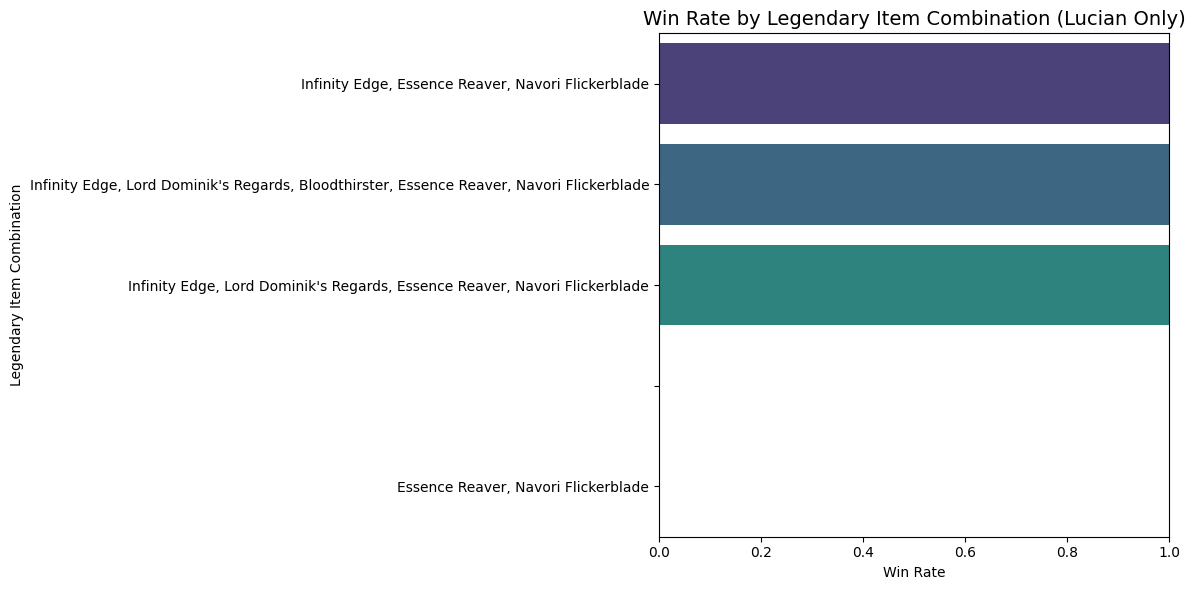

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


lucian_stats_plot = lucian_stats.copy()
lucian_stats_plot = lucian_stats_plot.reset_index()
lucian_stats_plot['combo_str'] = lucian_stats_plot['legendary_items_named'].apply(lambda x: ', '.join(x))

plt.figure(figsize=(12, max(6, len(lucian_stats_plot) * 0.4)))
sns.barplot(
    y='combo_str',
    x='win_rate',
    data=lucian_stats_plot,
    palette='viridis'
)

plt.title("Win Rate by Legendary Item Combination (Lucian Only)", fontsize=14)
plt.xlabel("Win Rate")
plt.ylabel("Legendary Item Combination")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
